# This file contains the programming as well as the questions that were to be answered for the business

## Please follow the below structure while attempting the hackathon, make sure to submit the jupyter file as well for every submission you are making.

## Please answer the descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation.

## Importing Necessary Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
pd.options.display.max_columns=50
plt.rcParams['figure.figsize']=[15,8]

# Understanding the data

In [7]:
# Importing the file
test = pd.read_csv('Test_Set_TVS.csv')
train = pd.read_csv('Train_Set_TVS.csv')

In [8]:
# Head of trian
train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [9]:
train.Default.isnull().sum()
# No null values in target

0

In [10]:
# Head of test
test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [11]:
# Concating the train and test files
df = pd.concat([train,test],ignore_index=True)

In [12]:
# Shape of data
df.shape

(189200, 33)

In [13]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [14]:
df.ID.unique().shape # All the IDs are unique

(189200,)

In [15]:
# 5 Point summary of the numerical data
df.drop(columns='ID').select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Compensation,180208.0,744230.438577,444248.729335,148330.0,517246.5000,666187.5000,878798.5000,7.037702e+07
Loan_amt,189200.0,414729.738070,275070.546830,34275.0,204265.9875,349361.0000,558660.0000,2.872142e+06
Annuity_amt,182626.0,10841.400309,2061.154305,5852.1,9346.6775,10768.6650,12158.0975,4.130100e+04
density_Ind,181509.0,0.020452,0.015611,0.0,0.0104,0.0203,0.0304,2.037200e+00
Home_Appliances,173477.0,3.220830,1.241502,1.0,2.0000,4.0000,4.0000,1.900000e+01
Experience,158004.0,6.583515,6.335341,0.0,2.1000,4.6000,9.0000,4.810000e+01
Dependents,189200.0,2.154075,0.909041,1.0,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,172416.0,2.029933,0.504140,1.0,2.0000,2.0000,2.0000,3.000000e+00
Age,189200.0,43.936580,11.967729,21.0,34.0000,43.0000,54.0000,6.900000e+01
hour_Process,189200.0,12.066395,3.562959,0.0,10.0000,12.0000,15.0000,2.500000e+01


# Inference:
* **Anomalies**:
    * density_Ind: There are 0s in the data. Which is not possible there are bound to be people living around the applicant.
    * hour_Process: There are 0s in the data. There is going to be some time required to finish the process.
* **Observations**: 
    * Youngest applicants are 21 year old.
    * Highest earner in the data has income of 70377020 which is 9456.348% higher than average
    * There are applicant who did not but any products using credit links

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























# Checking for duplicates

In [16]:
df.set_index("ID")[df.set_index("ID").duplicated()]
# There are no Duplicates in the data

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# Checking for null values

In [17]:
null_df = pd.DataFrame(np.round((df.isnull().sum()[df.isnull().sum()>0]*100)/len(df),3),columns=['Percent'])
null_df['Number'] = df.isnull().sum()[df.isnull().sum()>0]
null_df.drop('Default',inplace=True)

null_col = list(null_df.index) # List of columns with null values

null_df

,Percent,Number
Compensation,4.753,8992
Vehicle_Status,6.864,12987
Annuity_amt,3.475,6574
density_Ind,4.065,7691
Job_Type,7.700,14568
Prop_List,1.520,2876
Home_Appliances,8.310,15723
Credit_Inq,2.038,3856
Experience,16.488,31196
Income_Alt,5.804,10981


In [18]:
# Creating Dictionary to save information about the variables
info = {'null_df':'DataFrame with null % and values','null_col':'List of columns with null'}

In [19]:
df1 = df.copy() # Creating copy of original data frame

In [20]:
df1.drop('ID',axis=1,inplace=True)

# Checking for outliers


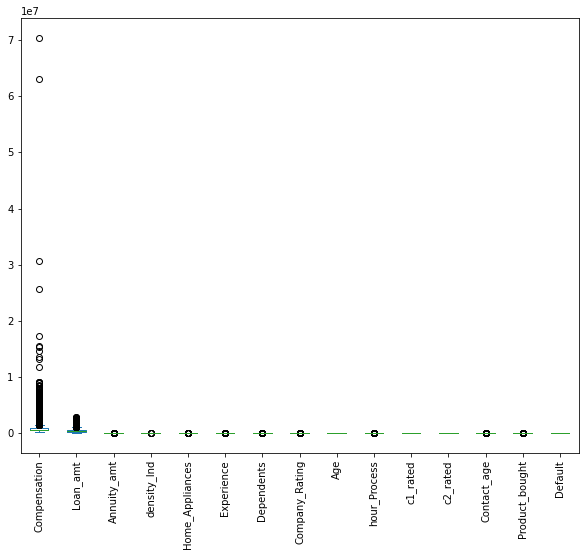

In [21]:
df1.plot(kind='box',figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

# Inference
* The data has outliers. If these outliers were to be removed then important inforamtion in Compensation will be lost. In reality there are going to be applicant with high income in such situation Loan_amt is also higher if outliers were to be removed then these applicants will be lost.
* hour_Process: Also has outliers busieness needs this information to understand why there were application that took too long to process

# Treating Null values

# Compensation 4.753% Null values in total

# Checking correlation of Compensation with other variables

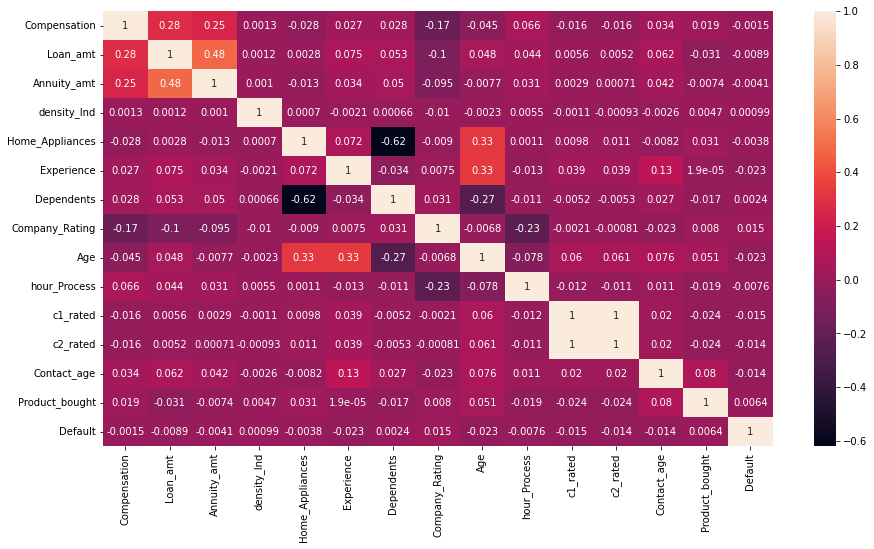

In [22]:
plt.figure(figsize=[15,8])
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Inference
* Compensation has positive correlation with Loan_amt and Annuity_amt. Negative correlation with Company_Rating

## Compensation may also depend on following variables
* cat = ['Vehicle_Status','Job_Type','Prop_List','Education_det','Company_Rating']
* num = ['Loan_amt','Annuity_amt','Home_Appliances','Experience']

In [23]:
info['cat_var'] = 'Categorical variables that have any affect'
info['num_var'] = 'Numerical variables that have any affect'

In [24]:
cat_var = ['Vehicle_Status','Job_Type','Prop_List','Education_det','Marital_Stat','Company_Rating']
num_var = ['Loan_amt','Annuity_amt','Home_Appliances','Experience','Age']

In [25]:
df1.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


# Plotting Compensation with other numerical variables to see the trends

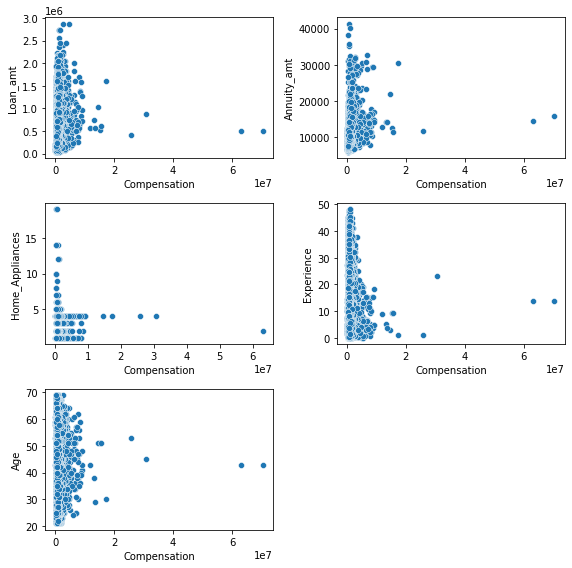

In [26]:
c=1
plt.figure(figsize=[8,8])
for i in num_var:
    plt.subplot(3,2,c)
    sns.scatterplot(y=i,x='Compensation',data=df1)
    c+=1
plt.tight_layout()
plt.show()

# Inference
* There seem to be no trend in scatter plot

# Plotting Compensation with other Categorical variables to see the trends

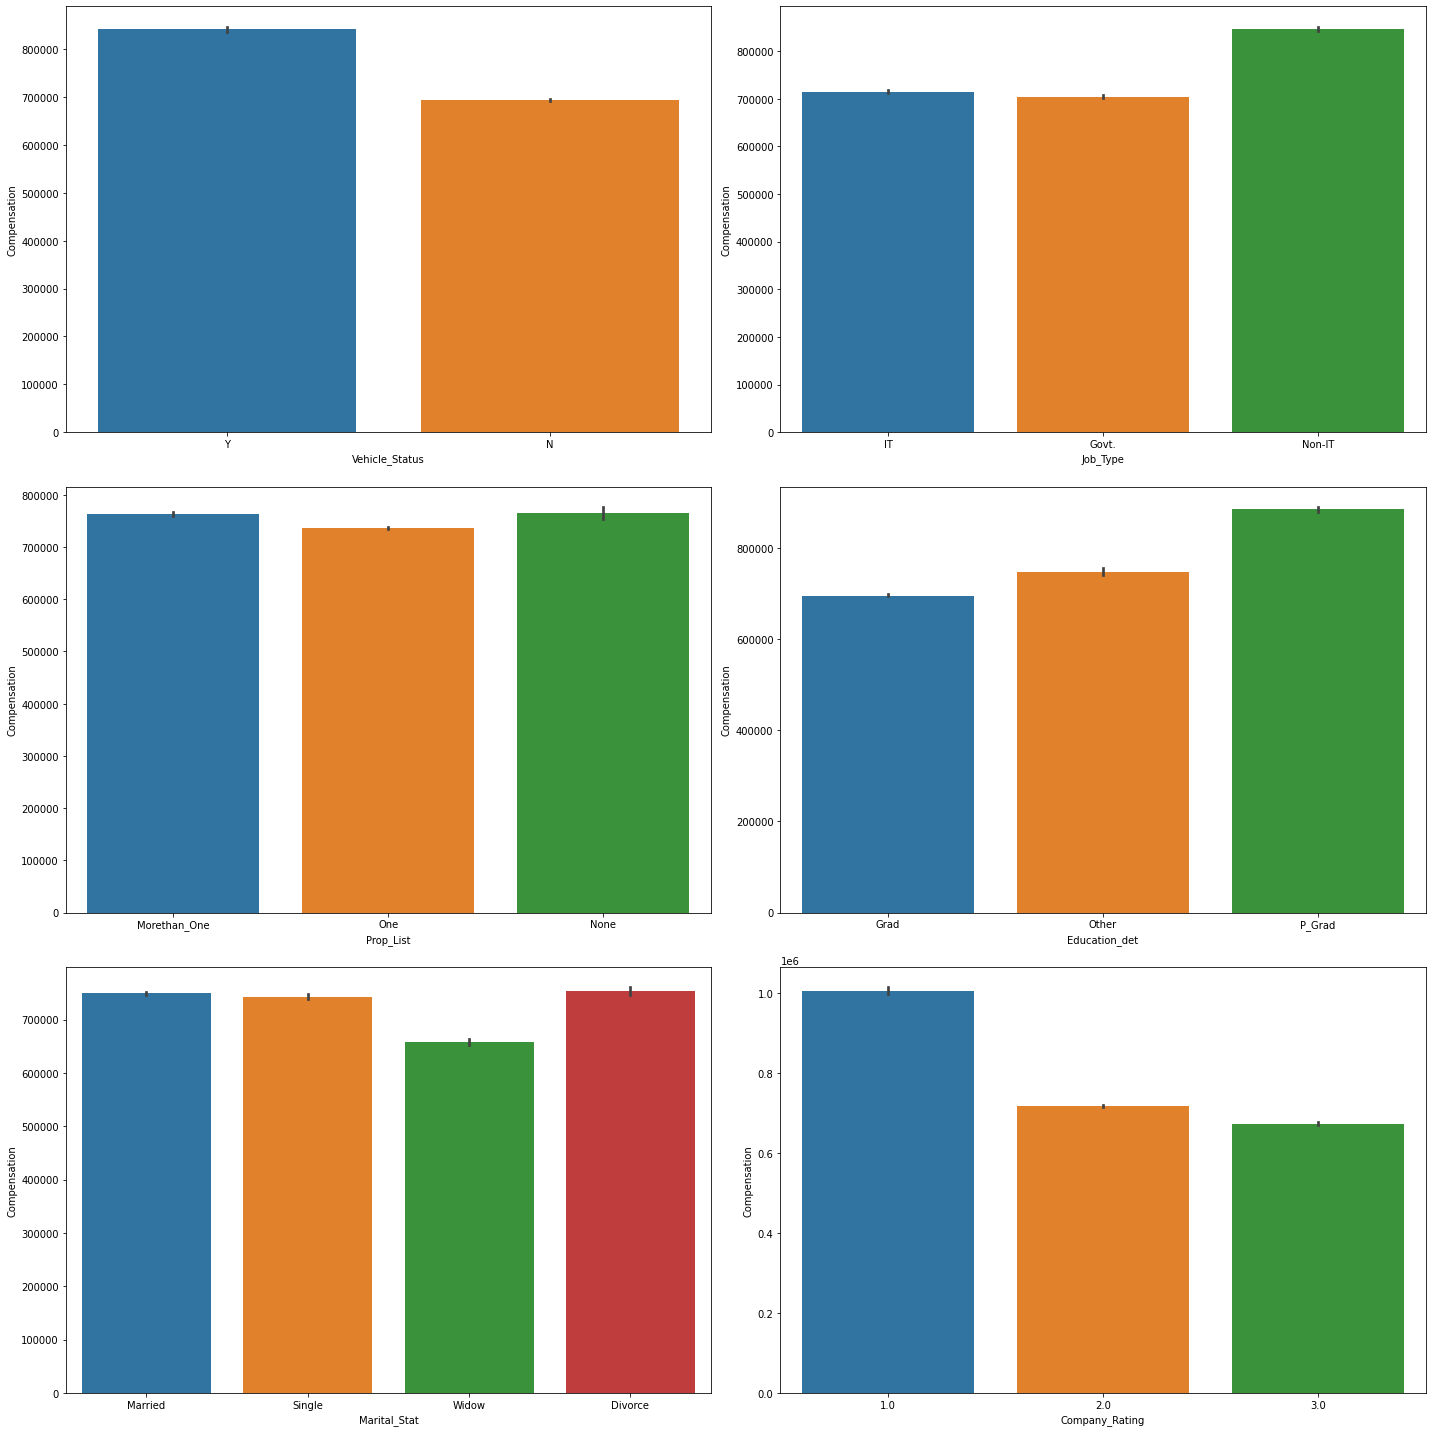

In [27]:
c=1
plt.figure(figsize=[20,20])
for i in cat_var:
    plt.subplot(3,2,c)
    sns.barplot(x=i,y='Compensation',data=df1)
    c+=1
plt.tight_layout()
plt.show()

# Inference
### From the above bar plot bellow listed categorical variables seem to show trend with Compensation variable
* Non_IT job type has higher average Compensation
* N Vehicle_Status seem to have lower average Compensation
* p_Grad applicants have higher average Compensation
* Widow Applicants have lower average Compensation
* Company_Rating 1.0 has higher average Compensation
* Prop_List don't have any significant differences

In [28]:
# Categorical variables that show trend with Compensation variable
cat_var = ['Vehicle_Status','Job_Type','Education_det','Marital_Stat','Company_Rating']

# Finding the quantile range for numerical variables to bin the numerical variables
## Binning is done in following manner:
* **Upper_Out**: The data outside the upper limit
* **Lower_Out**: The data outside the lower limit
* **Lower_whisk**: The data between lower limit and first quantile(q1)
* **upper_whisk**: The data between upper limit and third quantile(q3)
* **q1**: The data between first quantile(q1) and median(q2)
* **q3**: The data between median(q2) and third quantile q3

In [29]:
num = list(df1.select_dtypes(include=np.number).columns)
num.remove('Company_Rating')
num.remove('Default')
num,len(num)

(['Compensation',
  'Loan_amt',
  'Annuity_amt',
  'density_Ind',
  'Home_Appliances',
  'Experience',
  'Dependents',
  'Age',
  'hour_Process',
  'c1_rated',
  'c2_rated',
  'Contact_age',
  'Product_bought'],
 13)

In [30]:
q1 = df1[num[:-1]].quantile(0.25)
q3 = df1[num[:-1]].quantile(0.75)
q2 = df1[num[:-1]].quantile(0.50)
iqr = q3-q1
upper_limit = q3+iqr*1.5
lower_limit = q1-iqr*1.5
info['upper_limit/lower_limit']='Series: Upper limit and lower limit of numerical var'

In [31]:
info['bins']='Function to bin the numerical var'

# Binning the *['Loan_amt', 'Annuity_amt', 'Home_Appliances', 'Experience','Age]* to see the trend between Compensation the two as scatterplot did not show significant trend

# Loan_amt

In [32]:
def bins(x):
    if x>upper_limit[1]:
        return 'Upper_Out' 
    elif x<lower_limit[1]:
        return 'Lower_Out'
    elif (x >= lower_limit[1] and x<=q1[1]):
        return 'lower_whisk'
    elif(x>q1[1] and x<=q2[1]):
        return 'q1'
    elif (x <=q3[1] and x>q2[1]):
        return 'q3'
    elif (x>q3[1] and x<=upper_limit[1]):
        return 'upper_whisk'
df1['Loan_amt_binned'] = df1.Loan_amt.apply(bins)
df1.Loan_amt_binned

0         upper_whisk
1         lower_whisk
2         lower_whisk
3         lower_whisk
4         upper_whisk
             ...     
189195             q1
189196    upper_whisk
189197             q1
189198      Upper_Out
189199    lower_whisk
Name: Loan_amt_binned, Length: 189200, dtype: object

In [33]:
def ind_upper_limit(x):
    return list(upper_limit.index).index(x)
info['ind_upper_limit'] = 'Function will give index of numerical variable From upper_limit Series'

# Annuity_amt

In [34]:
ind_upper_limit('Annuity_amt')

2

In [35]:
def bins(x):
    if x>upper_limit[2]:
        return 'Upper_Out' 
    elif x<lower_limit[2]:
        return 'Lower_Out'
    elif (x >= lower_limit[2] and x<=q1[2]):
        return 'lower_whisk'
    elif(x>q1[2] and x<=q2[2]):
        return 'q1'
    elif (x <=q3[2] and x>q2[2]):
        return 'q3'
    elif (x>q3[2] and x<=upper_limit[2]):
        return 'upper_whisk'
df1['Annuity_amt_binned'] = df1.Annuity_amt.apply(bins)
df1.Annuity_amt_binned

0         upper_whisk
1                  q3
2         lower_whisk
3         lower_whisk
4         upper_whisk
             ...     
189195             q1
189196    upper_whisk
189197             q3
189198             q1
189199    upper_whisk
Name: Annuity_amt_binned, Length: 189200, dtype: object

In [36]:
df1.Annuity_amt_binned.isnull().sum()

6574

# Home_Appliances

In [37]:
ind_upper_limit('Home_Appliances')

4

In [38]:
def bins(x):
    if x>upper_limit[7]:
        return 'Upper_Out' 
    elif x<lower_limit[7]:
        return 'Lower_Out'
    elif (x >= lower_limit[7] and x<=q1[7]):
        return 'lower_whisk'
    elif(x>q1[7] and x<=q2[7]):
        return 'q1'
    elif (x <=q3[7] and x>q2[7]):
        return 'q3'
    elif (x>q3[7] and x<=upper_limit[7]):
        return 'upper_whisk'
df1['Home_Appliances_binned'] = df1.Home_Appliances.apply(bins)
df1.Home_Appliances_binned

0                None
1           Lower_Out
2         lower_whisk
3           Lower_Out
4           Lower_Out
             ...     
189195    lower_whisk
189196           None
189197      Lower_Out
189198    lower_whisk
189199    lower_whisk
Name: Home_Appliances_binned, Length: 189200, dtype: object

In [39]:
df1.Home_Appliances_binned.isnull().sum()

15723

# Experiance

In [40]:
ind_upper_limit('Experience')

5

In [41]:
def bins(x):
    if x>upper_limit[5]:
        return 'Upper_Out' 
    elif x<lower_limit[5]:
        return 'Lower_Out'
    elif (x >= lower_limit[5] and x<=q1[5]):
        return 'lower_whisk'
    elif(x>q1[5] and x<=q2[5]):
        return 'q1'
    elif (x <=q3[5] and x>q2[5]):
        return 'q3'
    elif (x>q3[5] and x<=upper_limit[5]):
        return 'upper_whisk'
df1['Experience_binned'] = df1.Experience.apply(bins)
df1.Experience_binned

0         lower_whisk
1                  q1
2                None
3                  q3
4                  q3
             ...     
189195             q1
189196    upper_whisk
189197    lower_whisk
189198    lower_whisk
189199    lower_whisk
Name: Experience_binned, Length: 189200, dtype: object

In [42]:
df1.Experience_binned.isnull().sum()

31196

# Age

In [43]:
ind_upper_limit('Age')

7

In [44]:
def bins(x):
    if x>upper_limit[7]:
        return 'Upper_Out' 
    elif x<lower_limit[7]:
        return 'Lower_Out'
    elif (x >= lower_limit[7] and x<=q1[7]):
        return 'lower_whisk'
    elif(x>q1[7] and x<=q2[7]):
        return 'q1'
    elif (x <=q3[7] and x>q2[7]):
        return 'q3'
    elif (x>q3[7] and x<=upper_limit[7]):
        return 'upper_whisk'
df1['Age_binned'] = df1.Age.apply(bins)
df1.Age_binned

0                  q3
1                  q3
2         upper_whisk
3                  q1
4         lower_whisk
             ...     
189195             q1
189196             q3
189197             q1
189198    lower_whisk
189199             q1
Name: Age_binned, Length: 189200, dtype: object

In [45]:
df1.Age_binned.isnull().sum()

0

In [46]:
binned_var = ['Loan_amt_binned', 'Annuity_amt_binned', 'Home_Appliances_binned', 'Experience_binned', 'Age_binned']

In [47]:
info['binned_var'] = 'Binned Numerical variables'

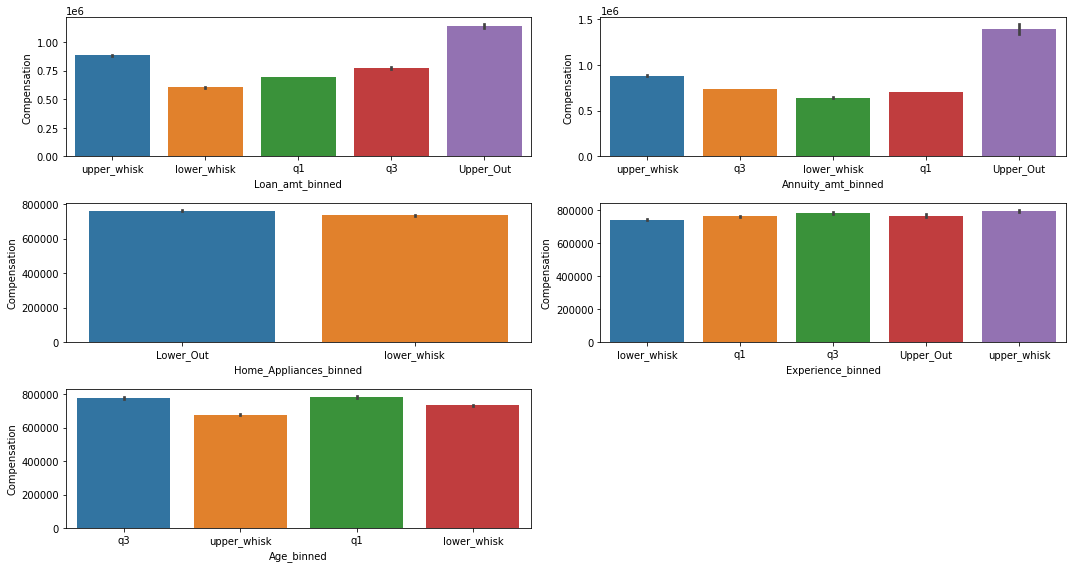

In [48]:
c=1
plt.figure(figsize=[15,8])
for i in binned_var:
    plt.subplot(3,2,c)
    sns.barplot(y='Compensation',x=i,data=df1)
    c+=1
plt.tight_layout()
plt.show()

# Inference
* Scatterplot did not show significant trend but after binning the numerical variables bellow mentioned variables show trend with Compensation
* ['Loan_amt_binned',
 'Annuity_amt_binned',
 'Age_binned']

In [49]:
var = ['Loan_amt_binned',
 'Annuity_amt_binned',
 'Age_binned'] + cat_var

In [50]:
len(var)
# Cannot use these variables together because it will be computationally heavy only using variables without null values

8

In [51]:
df1[var].isnull().sum()
#

Loan_amt_binned           0
Annuity_amt_binned     6574
Age_binned                0
Vehicle_Status        12987
Job_Type              14568
Education_det             0
Marital_Stat              0
Company_Rating        16784
dtype: int64

In [52]:
final_var = ['Loan_amt_binned',
 'Age_binned',
 'Education_det',
 'Marital_Stat',]
info['final_var'] = 'Final list of useful variables'

In [53]:
ser = df1.groupby(final_var)[['Compensation']].median().sort_values(by='Compensation',ascending=False).dropna()
ser

Compensation
Loan_amt_binned Age_binned  Education_det Marital_Stat              
Upper_Out       q1          Other         Widow            1776918.0
                            P_Grad        Widow            1611998.0
                upper_whisk P_Grad        Divorce          1406300.0
                            Other         Divorce          1381760.0
                q3          P_Grad        Divorce          1309294.5
...                                                              ...
lower_whisk     upper_whisk Other         Married           444481.0
q1              q1          Other         Widow             435370.0
lower_whisk     upper_whisk Other         Divorce           410852.0
Upper_Out       upper_whisk Other         Widow             390354.0
                lower_whisk Other         Divorce           370044.0

[236 rows x 1 columns]

# Inference 
* Above series shows the different median(Because there are lots of outliers in Compensation variable) values for compensation with different values of variables that shows trend with Compensation
* Imputing null values using above Series.
* i.e. when Loan_amt_binned=='Upper_Out', Age_binned==q1' and so on then Compensation equals 1776918.0

In [54]:
info['null_ind']='List of null values in variables'

In [55]:
null_ind = list(np.where(df1.Compensation.isnull())[0])

In [56]:
# Bellow loop will run for 236 times and impute the null values when the condition mentioned is true
c=0
for i in list(ser.index):
    loc_null_ind = list(df1.iloc[null_ind].loc[(df1.Loan_amt_binned==i[0])&(df1.Age_binned==i[1])&
                                                   (df1.Education_det==i[2])&(df1.Marital_Stat==i[3])].index)
    c+=1
    df1.loc[loc_null_ind,'Compensation'] = ser.loc[i][0]
    if len(list(df1.loc[loc_null_ind,'Compensation'].index))>1:
        print(f'Index in series ser {c}')
        print(list(df1.loc[loc_null_ind,'Compensation'].index))

Index in series ser 5
[147543, 155793]
Index in series ser 6
[13186, 104870, 144463, 160406]
Index in series ser 7
[27887, 69788, 85019, 139223, 163886]
Index in series ser 9
[1005, 5284, 181023, 185817, 187379]
Index in series ser 10
[14559, 123431, 135273, 141176]
Index in series ser 12
[401, 7341, 22502, 22751, 39304, 49445, 59844, 64393, 78859, 80579, 81596, 86122, 87485, 90754, 117146, 117796, 136685, 149863, 153906, 154788, 156910, 158582, 164605, 181452, 182846, 183827, 184501, 188314]
Index in series ser 13
[110367, 168918]
Index in series ser 15
[2450, 8303, 11402, 11444, 22298, 35643, 37132, 52346, 69807, 76278, 78026, 78503, 86715, 86785, 94772, 95385, 107578, 110640, 122149, 128847, 132407, 133933, 137599, 164633, 187825]
Index in series ser 17
[2776, 18293]
Index in series ser 19
[25647, 85697, 105452, 151533]
Index in series ser 23
[18059, 23453, 24416, 28193, 34083, 36955, 52096, 52343, 62414, 62682, 69728, 80558, 83266, 87227, 91091, 101195, 125433, 128386, 135347, 1365

Index in series ser 74
[126754, 131477]
Index in series ser 75
[9173, 11655, 11996, 61208, 90151, 95017, 95506, 168371, 180655]
Index in series ser 76
[9115, 55070, 76066, 77770, 86039, 87101, 98616, 116311, 139230, 143963, 168100, 168417, 171861, 172906]
Index in series ser 77
[96285, 158725, 181454]
Index in series ser 79
[267, 2899, 4653, 12711, 31973, 38046, 45057, 83456, 90826, 93236, 98737, 107294, 109701, 111471, 111952, 122416, 129703, 165869, 169542, 178293, 180370, 183142, 187537]
Index in series ser 80
[2002, 6182, 10731, 14741, 16516, 18206, 18434, 21247, 22189, 23027, 25719, 26209, 27785, 28552, 28596, 29741, 30197, 35302, 36338, 38937, 39474, 49728, 52871, 59953, 60075, 60312, 60766, 61051, 62030, 63869, 65951, 66241, 66517, 69429, 71230, 71294, 72553, 72596, 72606, 76322, 77769, 80798, 82697, 83208, 83855, 88746, 92670, 92909, 103622, 103730, 103793, 105078, 108365, 109789, 111475, 115849, 116518, 117931, 118796, 120231, 123044, 127367, 128384, 128916, 130167, 130385, 13

Index in series ser 109
[2296, 3331, 7134, 12890, 12978, 22705, 24322, 28479, 32281, 35682, 36226, 44176, 45164, 48397, 52566, 54198, 55249, 64797, 68070, 69348, 73666, 74787, 75582, 76279, 77075, 77635, 77877, 79186, 83131, 91300, 91762, 105194, 106550, 108036, 109504, 109645, 114319, 114513, 118061, 123524, 124329, 133671, 134783, 142456, 144547, 149013, 152535, 152978, 158926, 162243, 162861, 165284, 175352, 175702, 178807, 180368, 181250, 186032, 187723]
Index in series ser 110
[9329, 21535, 21898, 28121, 42246, 51843, 56115, 57836, 58606, 59891, 63671, 80384, 92376, 94199, 99059, 104969, 122229, 125136, 135423, 137389, 139441, 148901, 150081, 169465, 170158, 170601, 170867, 181570]
Index in series ser 111
[2993, 3998, 5138, 5515, 5638, 6704, 6884, 9780, 10574, 11417, 11798, 12946, 13183, 14774, 15554, 15932, 16861, 17002, 18910, 19662, 20005, 21778, 22127, 23189, 25257, 26358, 26755, 28463, 28889, 30368, 32621, 37151, 37176, 37755, 39159, 41003, 43397, 43655, 44107, 44185, 45054, 

Index in series ser 133
[15024, 71612, 130729, 132632, 137166, 141723, 152124, 175466, 179103]
Index in series ser 134
[10851, 23598, 35279, 47953, 77113, 107519, 152248, 159386, 184273]
Index in series ser 136
[341, 1694, 1753, 5107, 7112, 8197, 9225, 11520, 15698, 15862, 16261, 17519, 18078, 19778, 21149, 22017, 22643, 23201, 26928, 30491, 30776, 31535, 32290, 34453, 36486, 37207, 37603, 37948, 38885, 39864, 40154, 40493, 40766, 41164, 41751, 43353, 44350, 47061, 47736, 47869, 48132, 48651, 48861, 49138, 49733, 51484, 51969, 52394, 52542, 55659, 58759, 71336, 71588, 76011, 81258, 82166, 82739, 85146, 85340, 85490, 85983, 87635, 89123, 90155, 92308, 93629, 95438, 96838, 98881, 99178, 99268, 100249, 102931, 105700, 105869, 105879, 106828, 110783, 115975, 116398, 117291, 120038, 120697, 124202, 124430, 126069, 129602, 130505, 133765, 135744, 136063, 141171, 141769, 142664, 143130, 144847, 150934, 153687, 157282, 158048, 160957, 162324, 163077, 164081, 166936, 167155, 167689, 167819, 167

Index in series ser 147
[1225, 18308, 30961, 39694, 40269, 42362, 69846, 75900, 77892, 84531, 87989, 109659, 130154, 161319, 161979, 168876, 170975, 178938, 181617, 183610, 185931]
Index in series ser 148
[12479, 37219, 39798, 45282, 49903, 50539, 64040, 67033, 76939, 78010, 82906, 94175, 107366, 107711, 115343, 116709, 125454, 129781, 130382, 139250, 140372, 141573, 154459, 164056, 165536, 177949, 180109, 180478, 184990, 186736]
Index in series ser 149
[6286, 6650, 36659, 38486, 92067, 101125]
Index in series ser 150
[15185, 36729, 50293, 71888, 90498, 97500, 121621, 131817, 148487, 167470, 169925, 179887]
Index in series ser 151
[90270, 126469]
Index in series ser 152
[92, 13590, 14055, 16003, 29042, 119543, 149315, 158969, 182361, 188963]
Index in series ser 153
[3187, 14220, 14540, 42354, 43385, 61228, 68183, 118083, 178959]
Index in series ser 154
[292, 3374, 6826, 7756, 9083, 9359, 15291, 16739, 17516, 17985, 19894, 24532, 24881, 28224, 29065, 29161, 30061, 31096, 36581, 39132, 4

Index in series ser 176
[8547, 56645, 172858]
Index in series ser 177
[17864, 20067, 40193, 61878, 62995, 78386, 80334, 93427, 101204, 105283, 124764, 124875, 175501, 177631]
Index in series ser 178
[23796, 24353, 73275, 165571]
Index in series ser 179
[588, 1207, 1346, 2103, 6590, 6655, 6827, 9824, 9877, 10903, 10906, 11394, 11704, 13625, 16366, 17097, 21015, 25633, 25939, 26393, 30324, 30411, 31028, 35983, 38930, 39592, 40163, 45765, 45881, 47546, 51266, 54609, 54651, 63303, 63675, 65057, 67945, 69905, 70377, 73222, 74105, 74218, 75777, 75934, 76804, 77082, 83899, 88167, 88217, 88590, 89540, 89968, 90710, 90868, 92279, 94930, 98720, 99054, 100365, 100860, 106233, 107630, 110509, 110941, 115583, 117054, 117159, 118667, 120568, 121765, 123704, 126500, 129666, 134753, 137613, 138945, 139490, 141447, 142042, 143396, 144113, 144233, 145159, 147926, 150220, 150439, 154179, 155035, 155485, 156004, 156270, 158628, 161013, 161356, 161388, 162348, 163757, 164683, 168112, 168638, 172350, 173968

[1554, 1778, 2086, 2976, 2986, 3834, 4670, 5169, 5635, 6056, 6692, 7753, 7797, 8105, 8187, 8494, 9340, 9411, 10276, 11351, 12120, 13386, 13547, 16543, 16680, 17149, 17245, 17410, 20323, 20610, 21215, 22471, 23078, 23603, 24370, 24477, 24603, 25815, 26127, 26198, 27067, 28038, 28431, 28551, 29047, 31351, 31683, 31838, 32164, 33324, 33760, 34105, 34381, 34997, 35103, 35728, 35729, 36533, 37069, 37638, 37969, 40093, 40360, 40848, 43285, 44142, 44169, 44508, 44804, 46635, 47217, 47853, 48543, 48818, 48997, 50386, 51589, 52607, 54117, 54248, 55029, 55470, 55585, 55803, 57776, 58113, 58302, 58414, 59205, 59744, 59789, 60017, 61698, 61914, 62521, 63182, 63199, 63351, 63651, 64852, 64998, 65684, 66186, 66462, 67375, 67488, 67653, 67722, 69740, 70884, 71346, 72967, 73049, 73072, 75020, 75372, 75968, 76236, 76483, 76695, 78022, 78862, 79622, 80616, 82814, 82912, 83274, 83959, 85995, 86340, 86411, 87507, 88327, 88806, 89488, 93112, 93256, 94364, 94589, 94595, 95603, 97353, 97608, 99255, 99982, 10

Index in series ser 216
[1342, 2795, 3145, 4427, 4745, 5099, 5613, 6298, 7188, 9049, 9183, 10041, 10068, 10364, 10608, 10823, 11343, 11998, 12561, 12613, 13043, 13509, 14657, 14807, 17198, 17503, 18777, 19059, 19955, 20698, 20791, 21361, 22430, 22818, 22985, 23740, 23838, 24065, 24331, 24502, 24814, 25589, 26956, 28097, 28196, 29371, 29476, 29590, 29968, 30966, 32650, 32759, 34142, 35252, 35374, 36092, 36769, 37879, 39192, 39692, 39796, 41074, 42867, 42920, 43182, 45796, 46081, 46824, 49915, 50165, 50390, 50700, 51063, 52904, 54114, 54520, 54912, 55109, 56010, 56394, 56592, 56789, 56870, 57225, 58666, 59798, 60644, 62070, 62584, 64176, 65291, 65956, 65984, 66675, 66894, 67353, 67964, 68149, 68313, 68659, 68865, 69285, 70012, 70973, 71792, 73626, 74619, 75215, 75552, 75727, 76765, 77132, 77361, 77740, 78338, 80561, 81268, 82972, 85194, 85548, 86310, 86671, 86958, 87473, 87913, 88797, 89071, 89433, 89789, 89921, 90798, 92193, 92555, 93315, 94020, 94549, 94963, 95011, 97027, 97504, 97561,

In [57]:
df1['Compensation'].isnull().sum()
# One remains due to there is only one combination and that has null value

1

In [58]:
df1.Compensation.fillna(df1['Compensation'][(df1.Loan_amt_binned=='q3')&(df1.Experience_binned=='lower_whisk')].median(),
                       inplace=True)

# Vehicle_Status 6.864% Null values

In [59]:
# BINNED Compensation
def bins(x):
    if x>upper_limit[0]:
        return 'Upper_Out' 
    elif x<lower_limit[0]:
        return 'Lower_Out'
    elif (x >= lower_limit[0] and x<=q1[0]):
        return 'lower_whisk'
    elif(x>q1[0] and x<=q2[0]):
        return 'q1'
    elif (x <=q3[0] and x>q2[0]):
        return 'q3'
    elif (x>q3[0] and x<=upper_limit[0]):
        return 'upper_whisk'

df1['Compensation_binned'] = df1.Compensation.apply(bins)
df1.Compensation_binned

0                  q3
1         upper_whisk
2         lower_whisk
3         lower_whisk
4         upper_whisk
             ...     
189195             q3
189196             q1
189197             q1
189198    upper_whisk
189199             q1
Name: Compensation_binned, Length: 189200, dtype: object

In [60]:
np.round(df1.groupby(['Vehicle_Status','Compensation_binned'])['Compensation'].count().sort_values(ascending=False
                                                                                                 ).reset_index())

,Vehicle_Status,Compensation_binned,Compensation
0,N,lower_whisk,33149
1,N,q1,31914
2,N,q3,28521
3,N,upper_whisk,19457
4,Y,q3,17084
5,Y,upper_whisk,16103
6,Y,q1,13635
7,Y,lower_whisk,9318
8,Y,Upper_Out,3982
9,N,Upper_Out,3050


# Inference
* The count of 'Y' is higher for Compensation_binned is Upper_Out and for the rest count of 'N' is higher.

In [61]:
null_ind = list(df1.loc[(df1.Compensation_binned=='Upper_Out')&(df1.Vehicle_Status.isnull())].index)
df1.loc[null_ind,'Vehicle_Status'] = 'Y'

In [62]:
null_ind = list(df1.loc[(df1.Compensation_binned!='Upper_Out')&(df1.Vehicle_Status.isnull())].index)
df1.loc[null_ind,'Vehicle_Status'] = 'N'

# Annuity_amt 3.475% null values
* From the Heat map it was seen that there is high correlation of Annuity_amt and Loan_amt and there is correlation of Annuity_amt and Compensation

In [63]:
ser = df1.groupby('Loan_amt_binned')['Annuity_amt'].median().sort_values(ascending=False)
ser

Loan_amt_binned
Upper_Out      13430.420
upper_whisk    11962.080
q3             11114.675
q1             10403.480
lower_whisk     9585.770
Name: Annuity_amt, dtype: float64

In [64]:
null_ind = list(df1[df1.Annuity_amt.isnull()].index)

In [65]:
c=0
for i in list(ser.index):
    loc_null_ind = list(df1.iloc[null_ind].loc[df1.Loan_amt_binned==i].index)
    c+=1
    df1.loc[loc_null_ind,'Annuity_amt'] = ser.loc[i]
    print(ser.loc[i])

13430.42
11962.08
11114.675
10403.48
9585.77


# density_Ind 4.065% null values
* This Variable has no correlation with other numerical variable in the data but this variable is location based and there are two other variable that has the data of location these two variables can be helpful in imputation of null values in density_Ind variable
* It was also observed that this variable has zero will need to impute that zero due to reason mentioned above

In [66]:
df1[df1.density_Ind==0.0]

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,Loan_amt_binned,Annuity_amt_binned,Home_Appliances_binned,Experience_binned,Age_binned,Compensation_binned
134995,596068.0,N,74064.0,8171.96,0.0,IT,df,None,2.0,Rural,2,Grad,Divorce,M,1_to_3,2.7,Not_Specified,wed,No,CLoan,3.0,NaN,East,25.0,14.0,Yes,Yes,0.228,0.228,NaN,3.0,NaN,lower_whisk,lower_whisk,Lower_Out,q1,lower_whisk,q1


<AxesSubplot:xlabel='density_Ind', ylabel='Region_Type'>

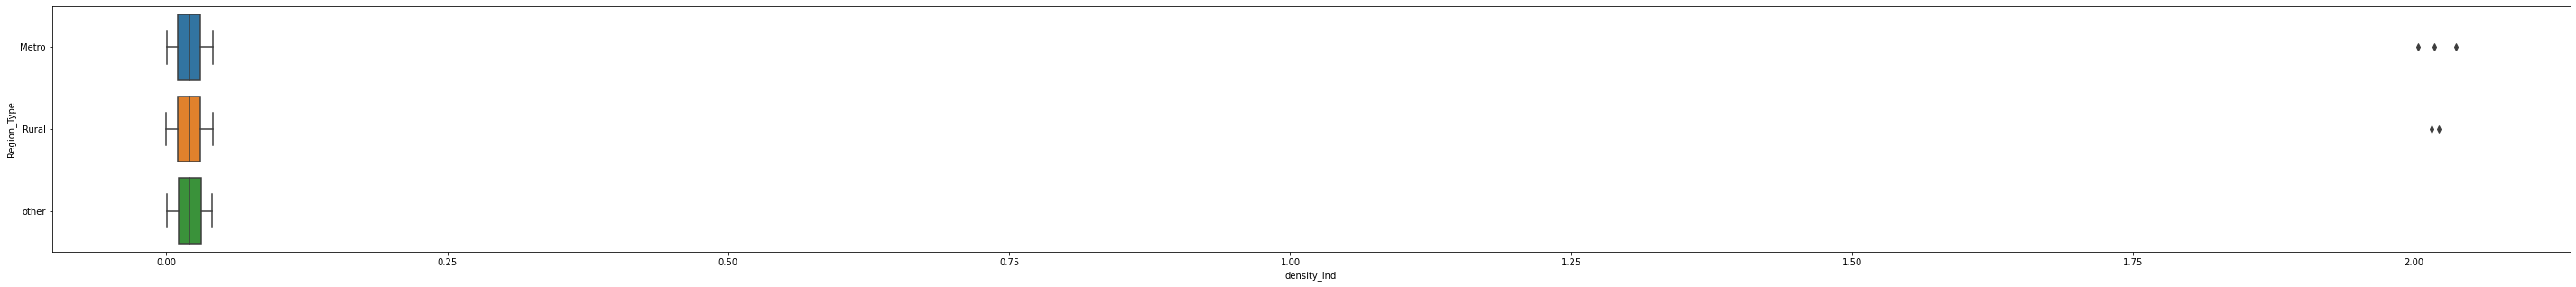

In [67]:
plt.figure(figsize=[50,5])
sns.boxplot(x='density_Ind',y='Region_Type',data=df1)

<AxesSubplot:xlabel='density_Ind', ylabel='Region'>

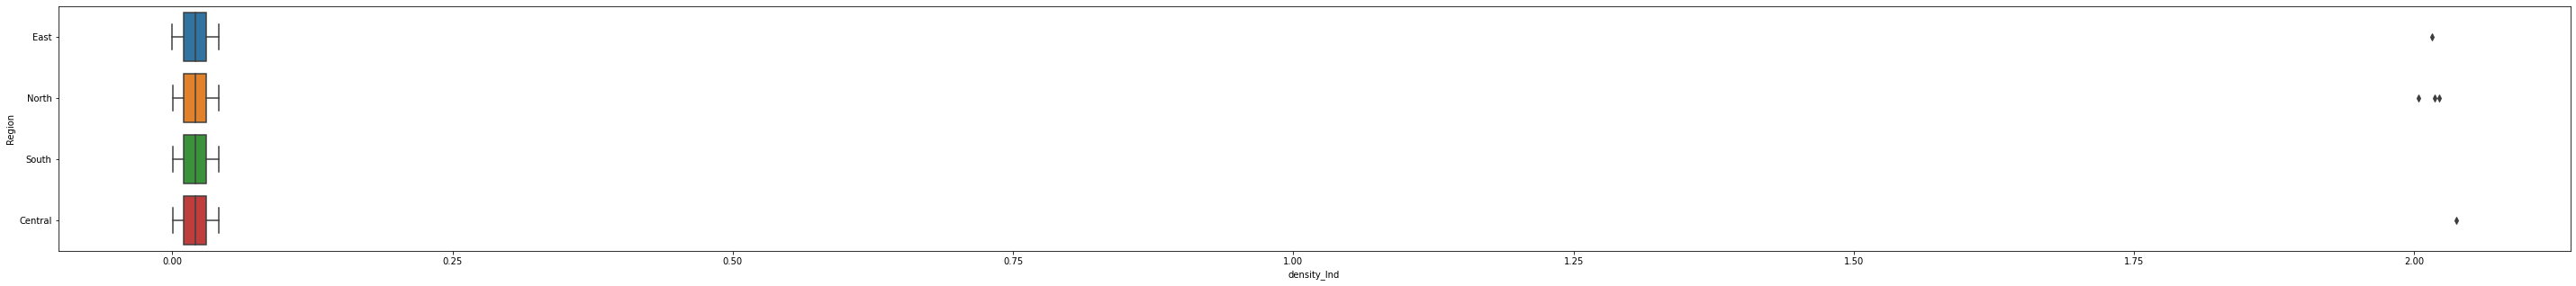

In [68]:
plt.figure(figsize=[50,5])
sns.boxplot(x='density_Ind',y='Region',data=df1)

<AxesSubplot:xlabel='density_Ind', ylabel='Region_Type'>

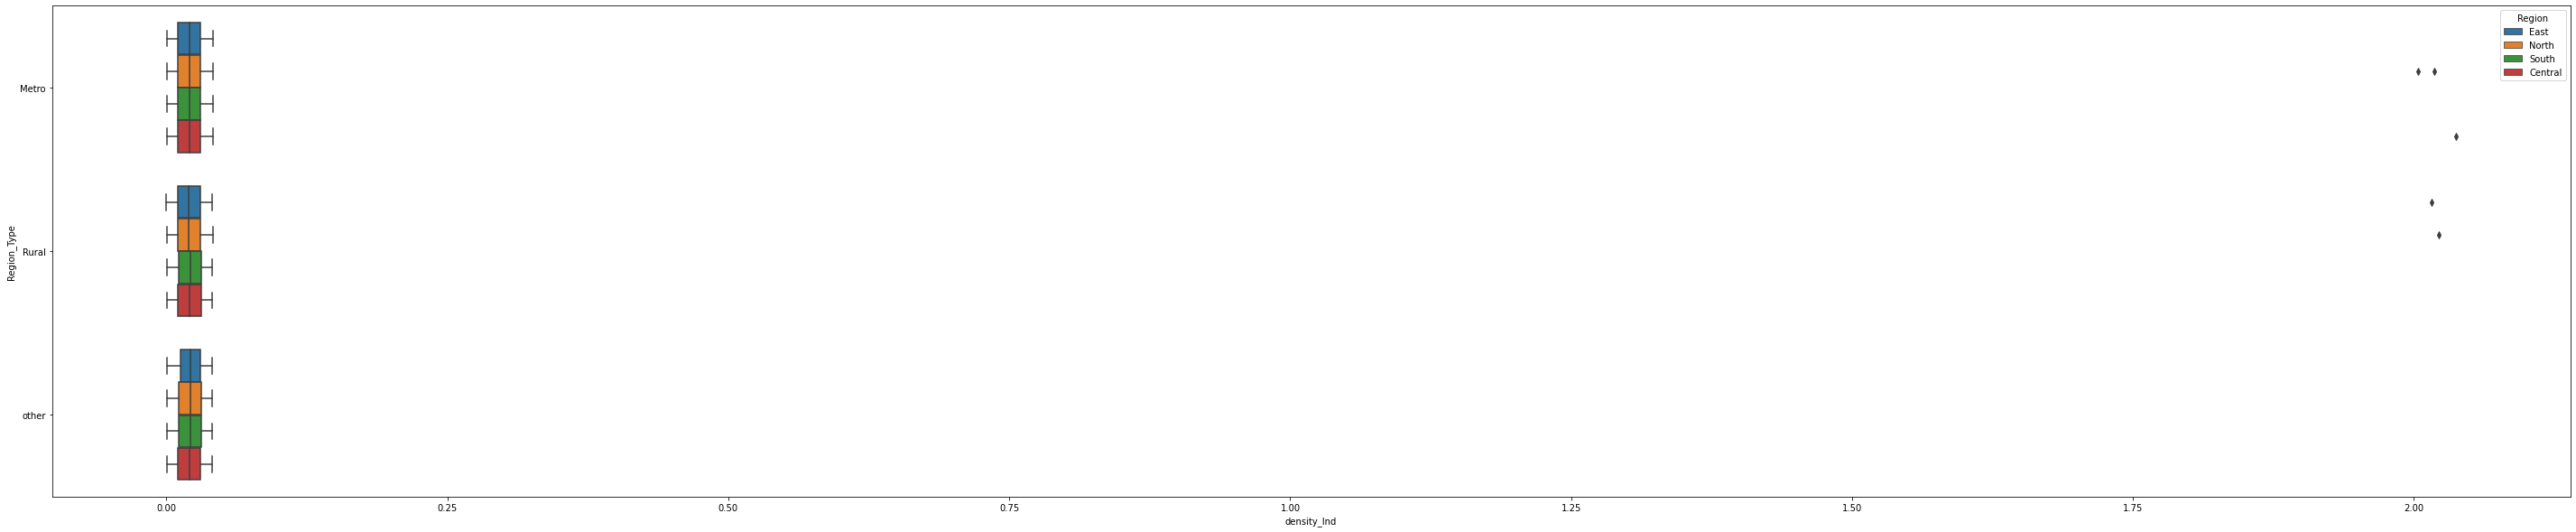

In [69]:
plt.figure(figsize=[50,10])
sns.boxplot(x='density_Ind',y='Region_Type',data=df1,hue='Region')

In [70]:
df1.groupby(['Region_Type','Region'])['density_Ind'].median()

Region_Type  Region 
Metro        Central    0.02030
             East       0.02020
             North      0.02040
             South      0.02030
Rural        Central    0.02080
             East       0.02010
             North      0.02000
             South      0.02100
other        Central    0.02035
             East       0.02125
             North      0.02100
             South      0.02100
Name: density_Ind, dtype: float64

# Inference
* There is no significant trend here

In [71]:
# Imputing The null values
df1.density_Ind.fillna(df1.density_Ind.median(),inplace=True)

In [72]:
# Replacing the 0
df1.loc[df1.density_Ind==0.0,'density_Ind'] = 0.0203

# Job_Type 7.7 % Null Values
* Compensation variable can be usefull to impute the Job_Type

In [73]:
df1.Job_Type.value_counts(normalize=True)*100

IT        54.843328
Non-IT    24.123872
Govt.     21.032800
Name: Job_Type, dtype: float64

In [74]:
np.round(df1.groupby(['Job_Type','Compensation_binned'])['Compensation'].describe()).sort_values(by='count',ascending=False)

count       mean        std        min  \
Job_Type Compensation_binned                                             
IT       q1                   26073.0   590278.0    41695.0   517248.0   
         q3                   24928.0   759571.0    60372.0   666190.0   
         lower_whisk          24509.0   421593.0    68823.0   148330.0   
         upper_whisk          17530.0  1053844.0   140472.0   878800.0   
Non-IT   q3                   11259.0   763762.0    60662.0   666264.0   
         upper_whisk          11123.0  1076009.0   148201.0   878920.0   
Govt.    lower_whisk          10188.0   417645.0    70652.0   151708.0   
         q1                    9844.0   590330.0    42014.0   517248.0   
Non-IT   q1                    9318.0   593340.0    41908.0   517257.0   
Govt.    q3                    9019.0   758586.0    60467.0   666216.0   
Non-IT   lower_whisk           7312.0   422765.0    70064.0   164844.0   
Govt.    upper_whisk           6582.0  1056510.0   141966.0   878904.0   
Non-IT   Upper_Out             3116.0  1985529.0  1032379.0  1421316.0   
IT       Upper_Out             2734.0  1883130.0  1973801.0  1421133.0   
Govt.    Upper_Out             1097.0  1798843.0   519667.0  1421245.0   

                                    25%        50%        75%         max  
Job_Type Compensation_binned                                               
IT       q1                    554230.0   590520.0   624468.0    666178.0  
         q3                    705600.0   755378.0   808842.0    878798.0  
         lower_whisk           377685.0   434010.0   477840.0    517242.0  
         upper_whisk           937481.0  1015664.0  1147138.0   1421028.0  
Non-IT   q3                    709102.0   761497.0   815332.0    878750.0  
         upper_whisk           948886.0  1043172.0  1183032.0   1420800.0  
Govt.    lower_whisk           371332.0   429921.0   475636.0    517240.0  
         q1                    553473.0   590829.0   625401.0    666185.0  
Non-IT   q1                    557256.0   595300.0   628670.0    666185.0  
Govt.    q3                    704736.0   752680.0   808782.0    878787.0  
Non-IT   lower_whisk           379884.0   436286.0   479844.0    517230.0  
Govt.    upper_whisk           937261.0  1017373.0  1151551.0   1420755.0  
Non-IT   Upper_Out            1543003.0  1710744.0  2040389.0  30689828.0  
IT       Upper_Out            1505491.0  1629454.0  1844004.0  70377021.0  
Govt.    Upper_Out            1515024.0  1644146.0  1877238.0   7831836.0

<AxesSubplot:xlabel='Job_Type'>

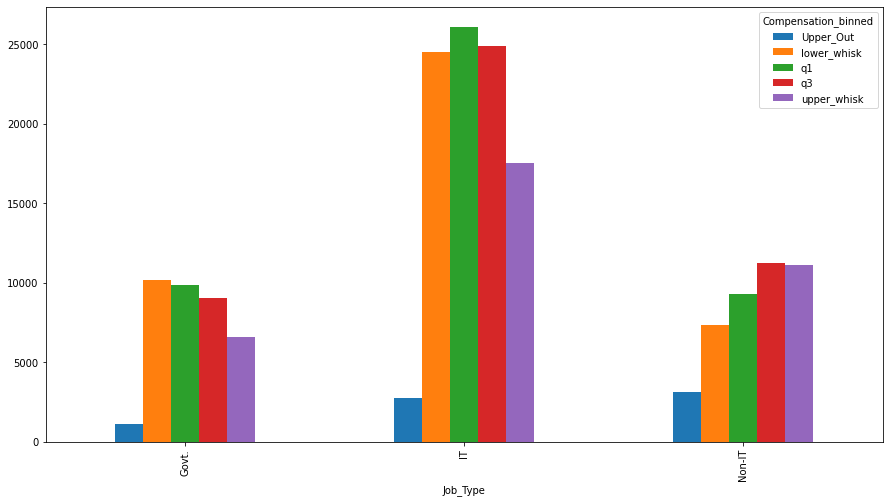

In [75]:
pd.pivot_table(values='Compensation',columns='Compensation_binned',index='Job_Type',data=df1,aggfunc='count').plot(kind='bar')

In [76]:
null_ind = list(df1.loc[(df1.Compensation_binned!='Upper_Out')&(df1.Job_Type.isnull())].index)

In [77]:
df1.loc[null_ind,'Job_Type']='IT'

In [78]:
df1.Job_Type.fillna('Non-IT',inplace=True)

# Prop_List 1.52% null values
* Following Variables may show a trend with Prop_List
* **Compensation**(num): Higher income meaning they have multiple property
* **Loan_amt**(num): For higher amounts of loan the applicant may be required to list property 
* **Gen**(cat): Males tend to inharit property 
* **hour_Process**(num): Applicant who listed morethan_one property may have longer process time
* **Age**(num): Older applicant may have listed morethan_one property

<AxesSubplot:xlabel='Gen'>

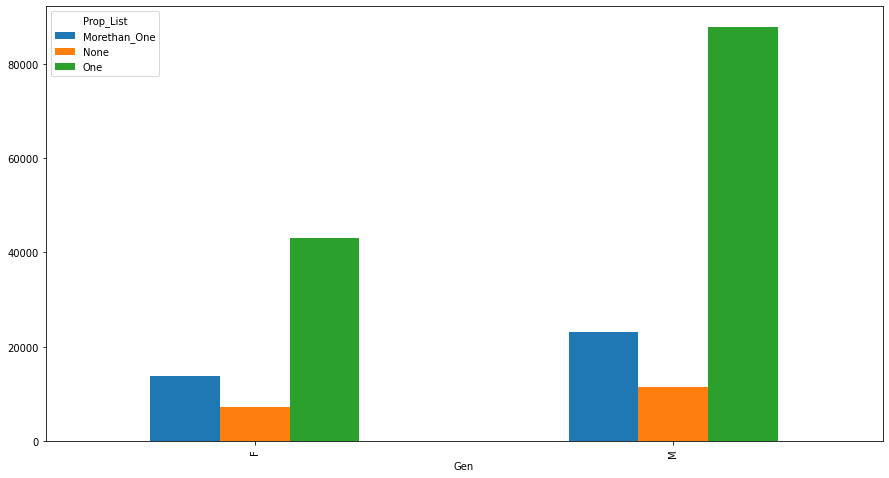

In [79]:
pd.crosstab(df1.Gen,df1.Prop_List).plot(kind='bar')

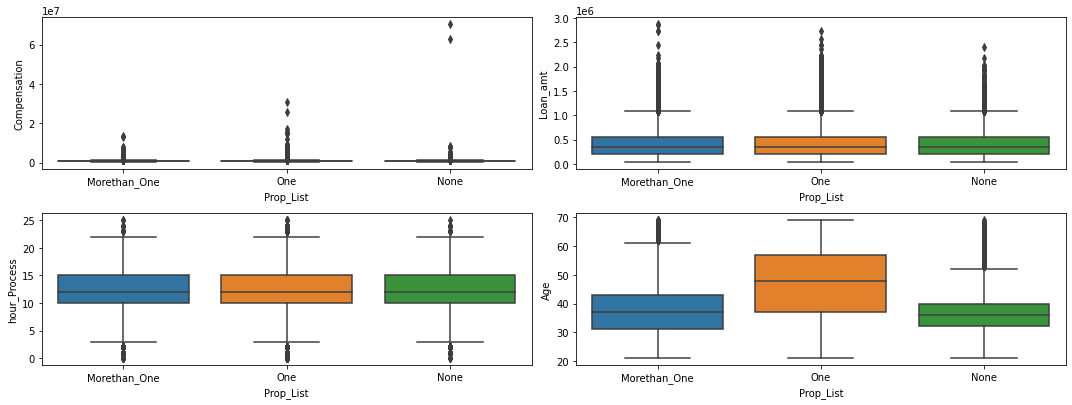

In [80]:
c=1
for i in ['Compensation','Loan_amt','hour_Process','Age']:
    plt.subplot(3,2,c)
    sns.boxplot(x='Prop_List',y=i,data=df1)
    c+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Prop_List', ylabel='Age'>

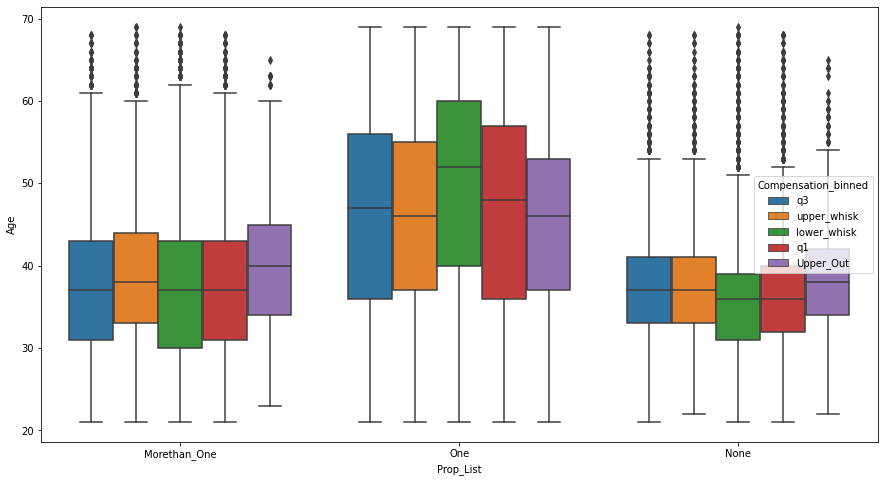

In [81]:
sns.boxplot(x='Prop_List',y='Age',data=df1,hue='Compensation_binned')

# Inference
* There seem to be no significant trend here.
* Prop_List for all age at has one and as for Morethan_One and None there is a range and has outliers but for One Prop_List there are no outliers

In [82]:
df1.Prop_List.fillna('One',inplace=True)

# Home_Appliances 8.31% null values
* Useful variables are as follows
* Compensation_binned(cat)(Not Compensation as scatterplot will not show significant trend), Region_Type(cat), Marital_Stat(cat), Dependents(num)

<AxesSubplot:xlabel='Dependents', ylabel='Home_Appliances'>

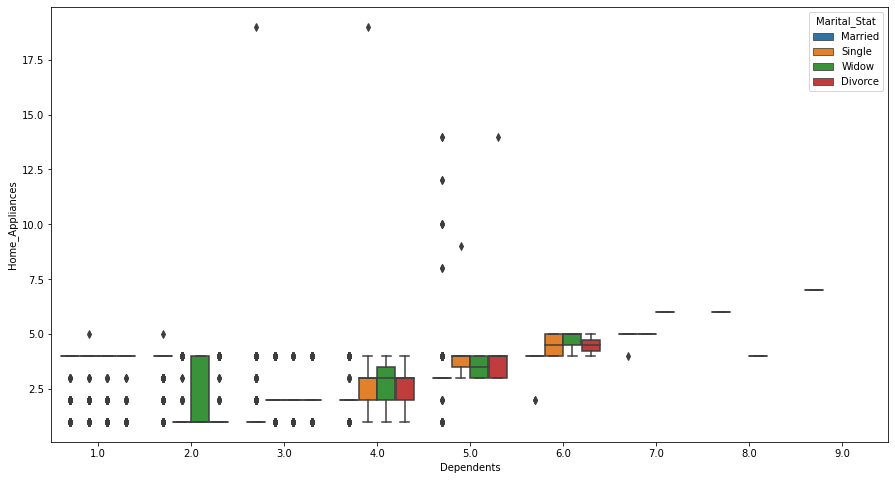

In [83]:
sns.boxplot(data=df1,y='Home_Appliances',x='Dependents',hue='Marital_Stat')

<AxesSubplot:xlabel='Dependents', ylabel='Home_Appliances'>

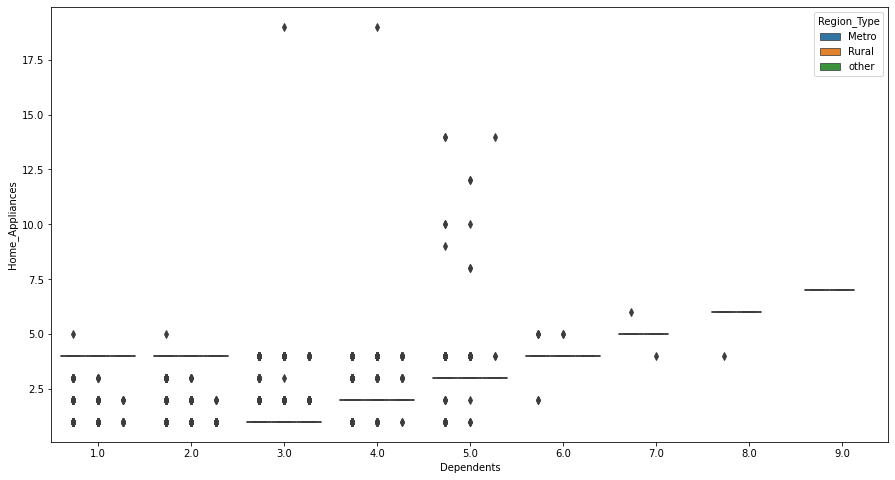

In [84]:
sns.boxplot(data=df1,y='Home_Appliances',x='Dependents',hue='Region_Type')

<AxesSubplot:xlabel='Dependents', ylabel='Home_Appliances'>

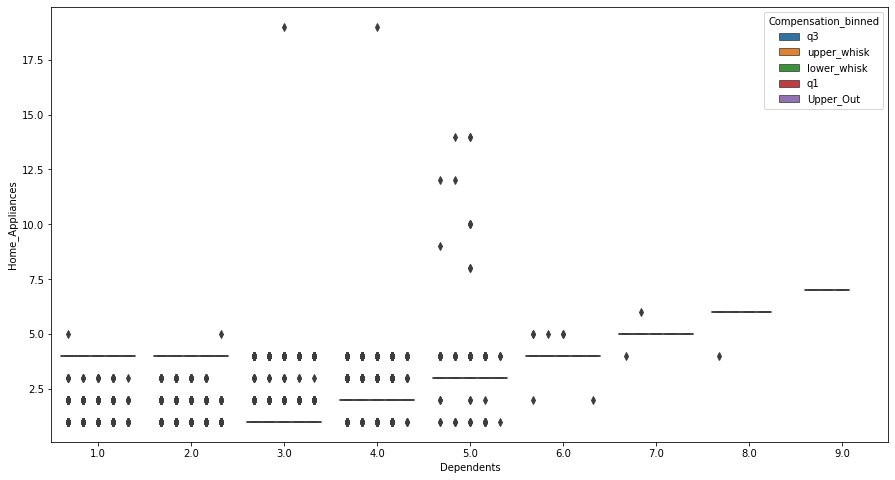

In [85]:
sns.boxplot(data=df1,y='Home_Appliances',x='Dependents',hue='Compensation_binned')

# Inference
* Dependents and Marital_Stat together show a visible trend here
* It's not easy to plot box plot due to heavy influence of outliers 

In [86]:
ser = np.round(df1.groupby(['Dependents','Marital_Stat','Compensation_binned'])[['Home_Appliances']].median()).dropna()
ser.reset_index()[ser.reset_index().Dependents==5.0]

,Dependents,Marital_Stat,Compensation_binned,Home_Appliances
80,5.0,Divorce,lower_whisk,4.0
81,5.0,Divorce,upper_whisk,4.0
82,5.0,Married,Upper_Out,3.0
83,5.0,Married,lower_whisk,3.0
84,5.0,Married,q1,3.0
85,5.0,Married,q3,3.0
86,5.0,Married,upper_whisk,3.0
87,5.0,Single,lower_whisk,4.0
88,5.0,Single,q1,4.0
89,5.0,Single,q3,4.0


In [87]:
ser = np.round(df1.groupby(['Dependents','Marital_Stat'])[['Home_Appliances']].median())
ser

Home_Appliances
Dependents Marital_Stat                 
1.0        Divorce                   4.0
           Married                   4.0
           Single                    4.0
           Widow                     4.0
2.0        Divorce                   1.0
           Married                   4.0
           Single                    1.0
           Widow                     1.0
3.0        Divorce                   2.0
           Married                   1.0
           Single                    2.0
           Widow                     2.0
4.0        Divorce                   3.0
           Married                   2.0
           Single                    3.0
           Widow                     3.0
5.0        Divorce                   4.0
           Married                   3.0
           Single                    4.0
           Widow                     4.0
6.0        Divorce                   4.0
           Married                   4.0
           Single                    4.0
           Widow                     5.0
7.0        Married                   5.0
           Single                    5.0
           Widow                     6.0
8.0        Married                   6.0
           Widow                     4.0
9.0        Married                   7.0

In [88]:
# Note: Here adding Compensation_binned in the groupby function doesnot add any useful information

In [89]:
# The box plot with dependents,home_appliances and marital status show a good trend will used it to impute null values
null_ind = list(df1[(df1.Home_Appliances.isnull())].index)

In [90]:
c=0
for i in list(ser.index):
    loc_null_ind = list(df1.iloc[null_ind].loc[(df1.Dependents==i[0])&(df1.Marital_Stat==i[1])].index)
    c+=1
    df1.loc[loc_null_ind,'Home_Appliances'] = ser.loc[i][0]
    if len(list(df1.loc[loc_null_ind,'Home_Appliances'].index))>1:
        print(f'Index in series ser {c}')
        print(list(df1.loc[loc_null_ind,'Home_Appliances'].index))

Index in series ser 1
[244, 595, 1203, 1937, 2371, 2797, 3486, 3875, 4341, 4812, 4938, 5481, 6444, 6646, 6881, 7171, 7373, 7398, 7460, 7859, 7897, 8035, 8524, 8675, 8719, 9657, 11461, 11597, 11942, 12118, 12411, 12524, 13713, 13901, 14012, 14072, 14361, 14441, 14964, 15512, 15577, 16097, 16187, 16549, 17337, 17525, 17654, 18356, 18810, 19317, 19324, 19800, 19852, 20249, 20363, 20422, 20443, 20466, 20937, 21154, 21180, 21351, 22160, 22295, 22354, 22551, 22556, 22822, 23200, 23294, 23352, 23395, 23505, 23696, 23719, 23953, 24064, 24194, 25444, 25906, 25983, 26193, 26474, 26556, 26581, 26582, 26690, 26876, 26887, 27088, 27282, 27438, 27702, 27874, 28142, 28525, 28632, 29075, 29244, 29705, 29889, 30055, 30064, 30449, 30643, 30969, 31001, 31170, 31372, 31637, 31876, 32215, 32529, 33015, 33114, 33128, 33254, 33315, 33434, 34127, 34290, 34333, 34341, 34437, 34525, 34584, 34754, 34847, 34956, 35262, 35860, 36001, 36310, 36924, 37064, 37134, 37157, 37250, 37371, 37469, 37522, 37806, 38195, 3870

Index in series ser 6
[26, 75, 82, 156, 172, 189, 209, 225, 249, 266, 314, 362, 384, 390, 410, 437, 441, 473, 484, 491, 494, 520, 528, 568, 570, 624, 641, 671, 695, 732, 743, 749, 782, 801, 868, 908, 915, 934, 976, 993, 1001, 1002, 1013, 1015, 1046, 1048, 1096, 1109, 1146, 1170, 1230, 1231, 1242, 1269, 1294, 1315, 1351, 1393, 1417, 1439, 1441, 1546, 1581, 1585, 1586, 1588, 1590, 1593, 1702, 1748, 1750, 1751, 1766, 1844, 1865, 1873, 1895, 1897, 1908, 1917, 1926, 1945, 1951, 1970, 1999, 2035, 2049, 2086, 2092, 2095, 2115, 2160, 2182, 2225, 2227, 2272, 2326, 2327, 2332, 2352, 2378, 2466, 2491, 2525, 2541, 2547, 2554, 2561, 2619, 2634, 2637, 2692, 2698, 2703, 2725, 2735, 2765, 2820, 2824, 2846, 2876, 2936, 2978, 2990, 3006, 3081, 3103, 3104, 3133, 3140, 3176, 3191, 3199, 3229, 3235, 3245, 3267, 3296, 3335, 3362, 3386, 3387, 3392, 3408, 3423, 3430, 3453, 3492, 3548, 3553, 3589, 3647, 3681, 3684, 3689, 3705, 3714, 3742, 3768, 3806, 3824, 3843, 3861, 3876, 3898, 3900, 3930, 3940, 3942, 3946, 

[0, 54, 198, 258, 288, 476, 550, 553, 587, 588, 1139, 1217, 1348, 1442, 1464, 1484, 1511, 1621, 1782, 1986, 2067, 2094, 2166, 2177, 2219, 2230, 2266, 2377, 2397, 2582, 2842, 2858, 2953, 3060, 3063, 3106, 3165, 3336, 3370, 3489, 3500, 3635, 3677, 3694, 3733, 3889, 3928, 3949, 4116, 4156, 4253, 4329, 4563, 4620, 4622, 4625, 4644, 4784, 4809, 4847, 4930, 4999, 5024, 5058, 5263, 5389, 5579, 5581, 5583, 5727, 5744, 5829, 5903, 5929, 5935, 6072, 6121, 6234, 6254, 6347, 6443, 6527, 6735, 6781, 7065, 7073, 7166, 7390, 7462, 7525, 7704, 7705, 7762, 7782, 7953, 8024, 8036, 8067, 8164, 8339, 8414, 8431, 8456, 8581, 8587, 8736, 8812, 8845, 8897, 8992, 9119, 9196, 9208, 9260, 9362, 9375, 9534, 9564, 9694, 9765, 9785, 9787, 9840, 9914, 10000, 10015, 10016, 10025, 10096, 10097, 10155, 10178, 10194, 10274, 10347, 10358, 10449, 10475, 10610, 10814, 10903, 11021, 11053, 11114, 11217, 11240, 11268, 11379, 11385, 11429, 11455, 11683, 11723, 11780, 11831, 11885, 12128, 12154, 12200, 12201, 12209, 12438, 12

Index in series ser 15
[4647, 14556, 14644, 38689, 45073, 65815, 87776, 90416, 91964, 111745, 134777, 171529]
Index in series ser 16
[122859, 161399, 173167, 183991]
Index in series ser 17
[46155, 179508]
Index in series ser 18
[1282, 4598, 6133, 6311, 7429, 8278, 11982, 13226, 13486, 17098, 23602, 24641, 25025, 25103, 25820, 25898, 26282, 27086, 27886, 28785, 30156, 32155, 32351, 32476, 32541, 32592, 34031, 35221, 35348, 35520, 35825, 37409, 37602, 39013, 40439, 41901, 42132, 42917, 43738, 44390, 44462, 44690, 45513, 46745, 49350, 49628, 50454, 51066, 51383, 52989, 53084, 54735, 55810, 56080, 57088, 59043, 60834, 60984, 61073, 62753, 63605, 66402, 66411, 66975, 67162, 68725, 69484, 71500, 72874, 72918, 73261, 74228, 76108, 76946, 77545, 78750, 79819, 79928, 80299, 80386, 84889, 85079, 90352, 90363, 90694, 91013, 92017, 94711, 95024, 96117, 96234, 98010, 99310, 104986, 105024, 105125, 106181, 107728, 109011, 110002, 110960, 112461, 114194, 114619, 114628, 114807, 117506, 117586, 118846

# Credit_Inq 2.038% null values
* Default_hist(cat) , c1_rated(num), c2_rated(num), Age(num)

In [91]:
df1.groupby(['Default_hist','Credit_Inq'])['Age'].describe()

count       mean        std   min   25%   50%  \
Default_hist Credit_Inq                                                    
df           1           11800.0  36.601441   6.324961  21.0  32.0  36.0   
             2            4480.0  37.110045   6.380135  21.0  33.0  37.0   
             3             474.0  48.662447  11.356047  21.0  39.0  49.0   
             >4           1837.0  36.703321   5.940487  24.0  33.0  36.0   
ndf          1           83975.0  41.198631  10.457058  21.0  32.0  41.0   
             2           38912.0  40.944207  10.593347  21.0  32.0  41.0   
             3           32702.0  59.025136   6.879251  21.0  57.0  60.0   
             >4          11164.0  42.172788  10.591947  21.0  33.0  42.0   

                          75%   max  
Default_hist Credit_Inq              
df           1           40.0  68.0  
             2           41.0  68.0  
             3           58.0  69.0  
             >4          40.0  68.0  
ndf          1           49.0  69.0  
             2           49.0  69.0  
             3           63.0  69.0  
             >4          50.0  69.0

<AxesSubplot:xlabel='Default_hist', ylabel='Age'>

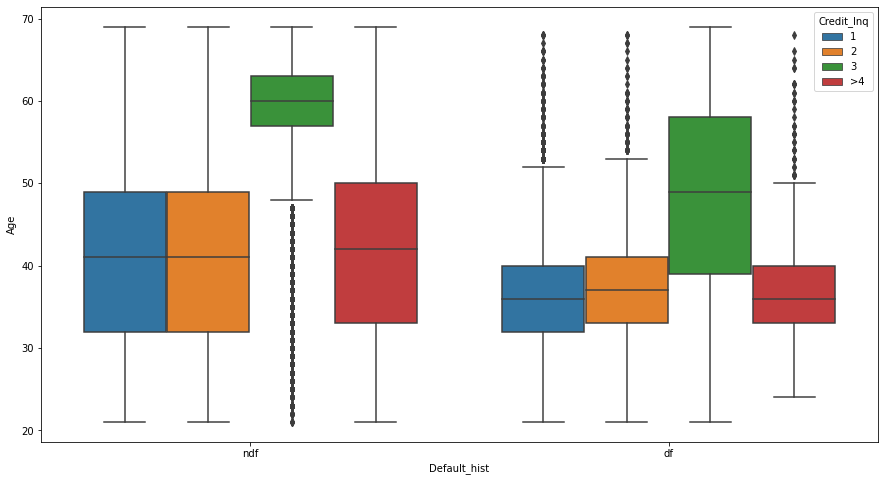

In [92]:
sns.boxplot(hue='Credit_Inq',x='Default_hist',data=df1,y='Age')

# Inference
* There seem to be no trend here so imputing null values with mode

In [93]:
df1.Credit_Inq.fillna(df1.Credit_Inq.mode()[0],inplace=True)

#  Experience 16.488% null values
* Age(num), Compensation(num), contact_age

<AxesSubplot:xlabel='Age', ylabel='Experience'>

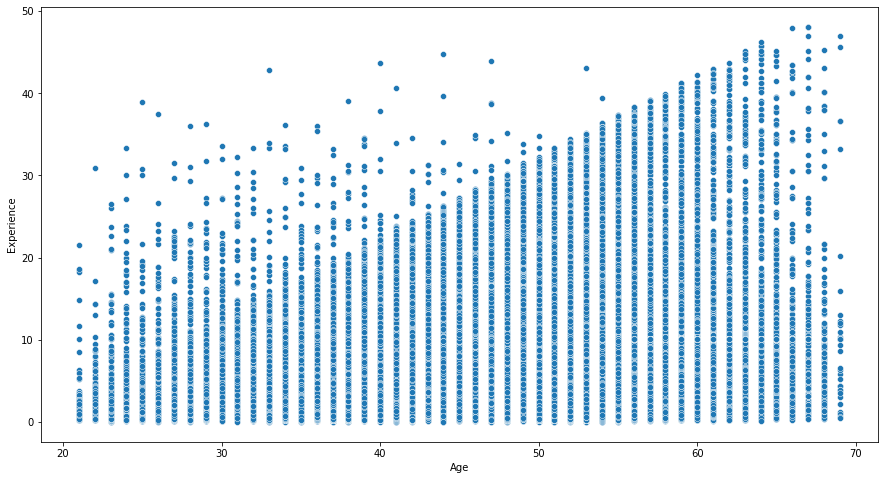

In [94]:
sns.scatterplot(data=df1,x = 'Age', y = 'Experience')

# Inference
* There is a clear pattern that as Age increases Experiance increases

In [95]:
ser = df1.groupby(['Age_binned'])['Experience'].median()
ser

Age_binned
lower_whisk    3.2
q1             4.9
q3             5.9
upper_whisk    8.2
Name: Experience, dtype: float64

In [96]:
null_ind = list(df1[df1.Experience.isnull()].index)

In [97]:
c=0
for i in list(ser.index):
    loc_null_ind = list(df1.iloc[null_ind].loc[df1.Age_binned==i].index)
    c+=1
    df1.loc[loc_null_ind,'Experience'] = ser.loc[i]

# Income_Alt 5.804% null values
* Compensation(num), Job_Type(cat), Home_Appliances(num), Region_Type(cat), Experience(num), Age(num)

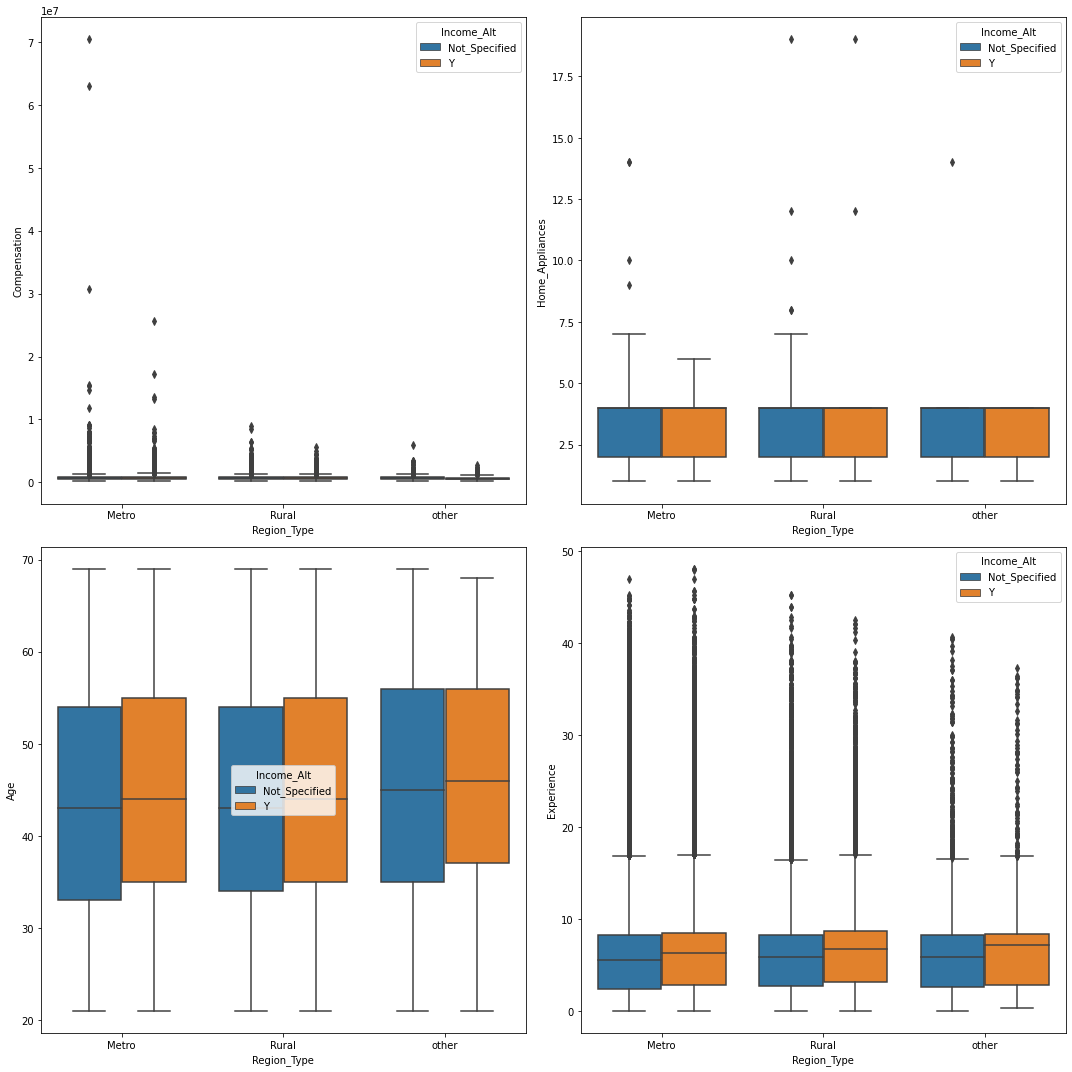

In [98]:
plt.figure(figsize=[15,15])
c=1
for i in ['Compensation','Home_Appliances','Age','Experience']:
    plt.subplot(2,2,c)
    sns.boxplot(data=df1, hue = 'Income_Alt', y = i, x='Region_Type')
    c+=1
plt.tight_layout()
plt.show()

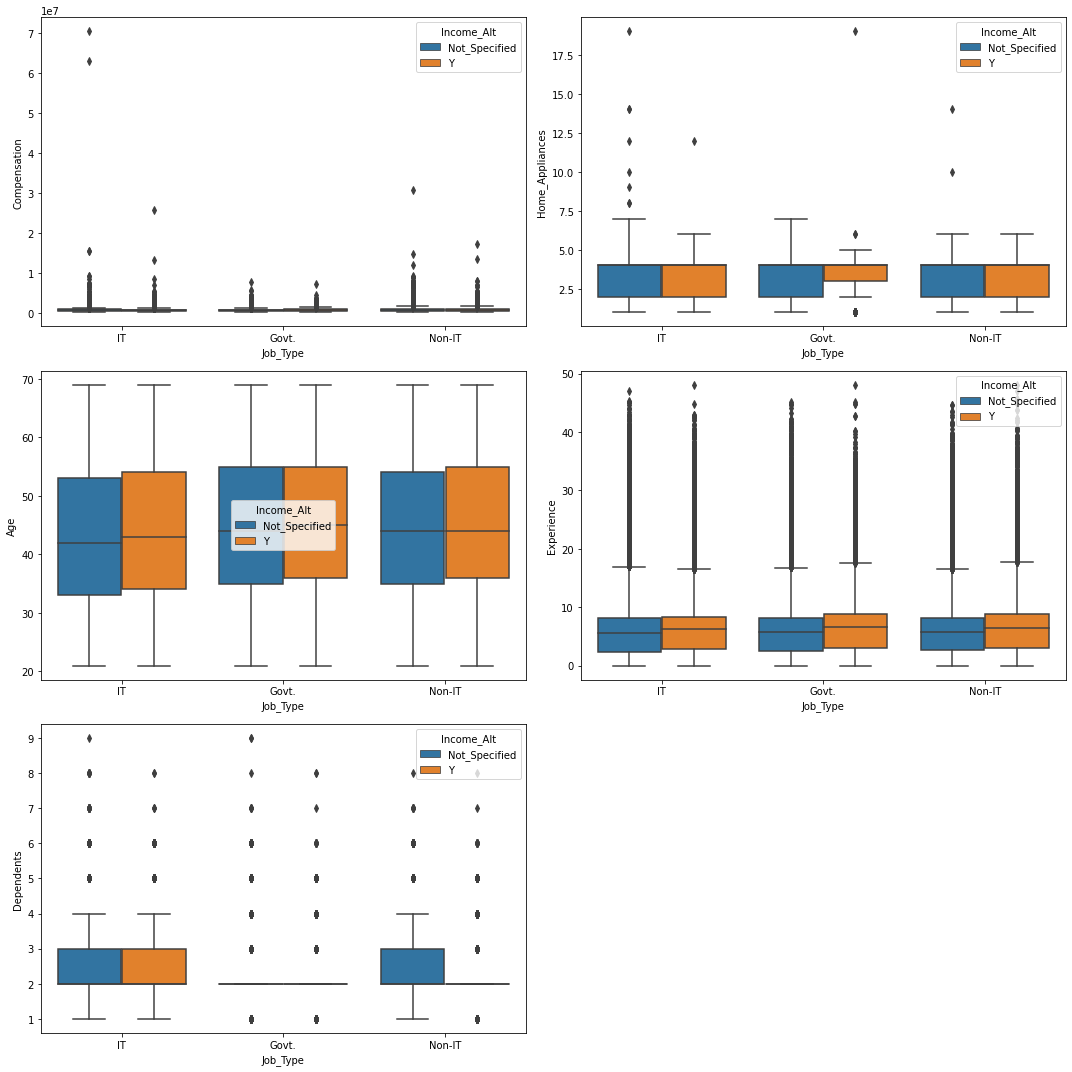

In [99]:
plt.figure(figsize=[15,15])
c=1
for i in ['Compensation','Home_Appliances','Age','Experience','Dependents']:
    plt.subplot(3,2,c)
    sns.boxplot(data=df1, hue = 'Income_Alt', y = i, x='Job_Type')
    c+=1
plt.tight_layout()
plt.show()

# Inference
* There seem to be no strong pattern here

In [100]:
df1.Income_Alt.fillna(df1.Income_Alt.mode()[0],inplace=True)

# Company_Rating 8.871% null values
* numerical variables that may be useful ['Compensation','Experience','Age']
* categorical variables that may be useful ['Job_Type','Region_Type','Education_det','Compensation_binned','Age_binned']

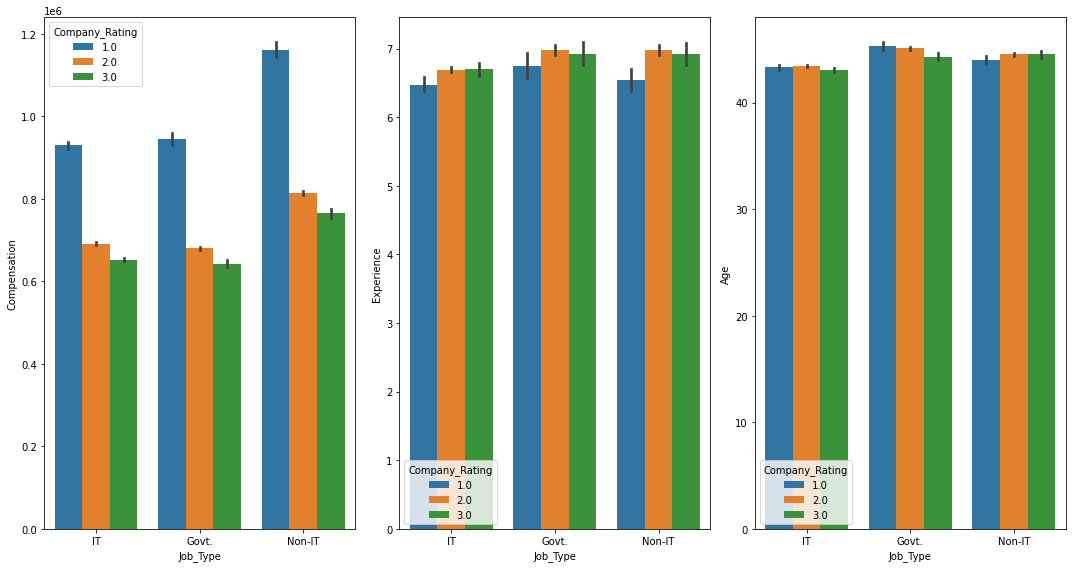

In [101]:
c=1
for i in ['Compensation','Experience','Age']:
    plt.subplot(1,3,c)
    sns.barplot(data=df1, hue = 'Company_Rating', y = i,x = 'Job_Type')
    c+=1
plt.tight_layout()
plt.show()

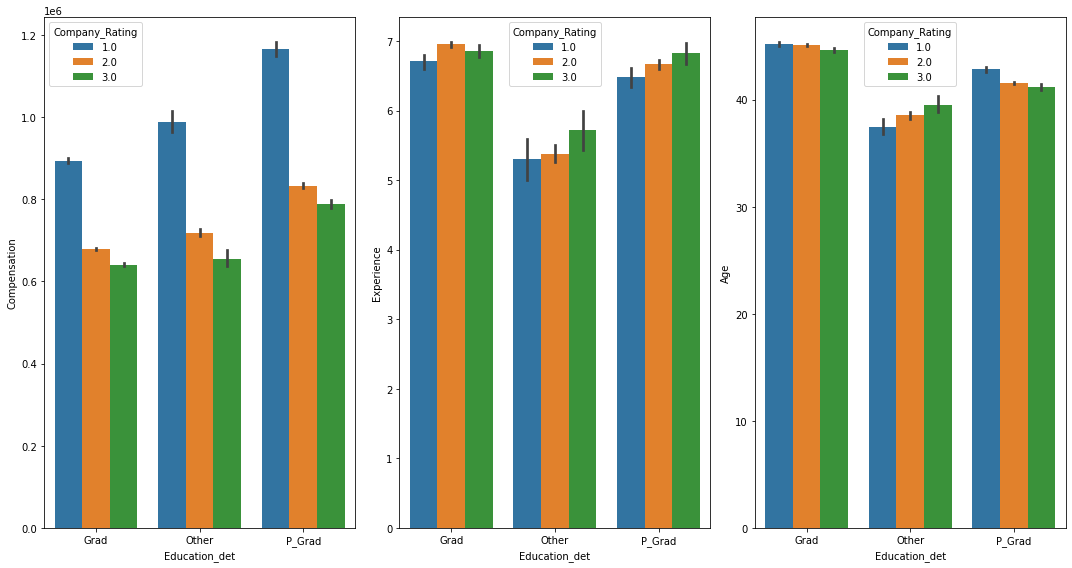

In [102]:
c=1
for i in ['Compensation','Experience','Age']:
    plt.subplot(1,3,c)
    sns.barplot(data=df1, hue = 'Company_Rating', y = i,x = 'Education_det')
    c+=1
plt.tight_layout()
plt.show()

# Inference
* Average Experience and age for different Job_Type and different Education_det has visible changes But as for Compensation trend remains constant.
* Hence using Compensation variable to impute null values

In [103]:
df1.groupby(['Compensation_binned','Education_det'])['Company_Rating'].value_counts()

Compensation_binned  Education_det  Company_Rating
Upper_Out            Grad           2.0                1687
                                    1.0                 954
                                    3.0                 259
                     Other          2.0                 182
                                    1.0                 133
                                    3.0                  17
                     P_Grad         2.0                1889
                                    1.0                1468
                                    3.0                 278
lower_whisk          Grad           2.0               26566
                                    3.0                6109
                                    1.0                1117
                     Other          2.0                1440
                                    3.0                 376
                                    1.0                  65
                     P_Grad         2.0          

In [104]:
# Here mode seems to be 2 for all different combination of Compensation and Education_det
# hence replacing the null values with 2.0
df1.Company_Rating.fillna(2,inplace=True)

# c1_rated 13.148% null values
* The c1_rated and c2_rated both are perfectly correlated with each other as seen in the heatmap. To impute the null values in c1_rated c2_rated will be used

<AxesSubplot:xlabel='c1_rated', ylabel='c2_rated'>

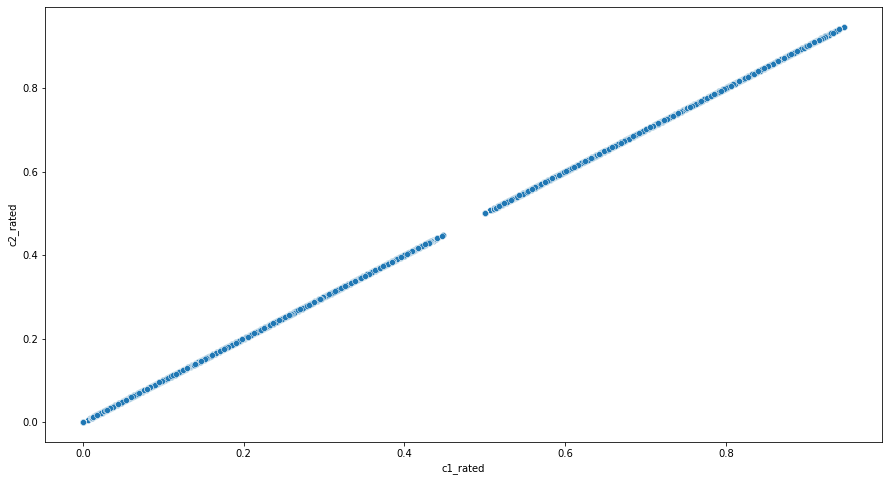

In [105]:
sns.scatterplot(x = 'c1_rated' , y = 'c2_rated' , data=df1)

In [106]:
df1.loc[df1.c1_rated.isnull(),'c1_rated'] = df1.loc[df1.c1_rated.isnull(),'c2_rated']

In [107]:
df1.c1_rated.isnull().sum()

2555

In [108]:
# There still remains 2555 null values due to c2_rated having null values

sns.boxplot(data=df1,x = 'Loan_amt_binned',y = 'c1_rated',hue='Default_hist')

In [109]:
ser = df1.groupby('Loan_amt_binned')['c1_rated'].mean()
ser

Loan_amt_binned
Upper_Out      0.514658
lower_whisk    0.508631
q1             0.502858
q3             0.502650
upper_whisk    0.509847
Name: c1_rated, dtype: float64

# Inference
* There is no trend and mean is almost same here

In [110]:
null_ind = list(df1[(df1.c1_rated.isnull())].index)

In [111]:
c=0
for i in list(ser.index):
    loc_null_ind = list(df1.iloc[null_ind].loc[df1.Loan_amt_binned==i].index)
    c+=1
    df1.loc[loc_null_ind,'c1_rated'] = ser.loc[i]
    if len(list(df1.loc[loc_null_ind,'c1_rated'].index))>1:
        print(f'Index in series ser {c}')
        print(list(df1.loc[loc_null_ind,'c1_rated'].index))

Index in series ser 1
[3122, 8180, 10453, 10728, 17889, 18293, 21083, 28830, 32721, 32739, 35062, 36284, 36894, 37823, 37841, 40202, 41493, 50556, 50578, 52541, 54518, 56065, 56535, 56877, 57623, 59418, 59790, 60145, 62817, 64370, 65572, 69230, 70266, 70353, 70556, 76921, 78037, 88192, 90448, 96190, 96332, 102450, 102633, 107468, 107578, 113013, 116327, 121381, 122515, 127938, 132833, 149521, 151020, 151167, 151574, 154649, 162432, 162784, 168142, 173947, 176076, 176626, 179424, 181147, 182659, 187255]
Index in series ser 2
[215, 579, 660, 775, 779, 1029, 1706, 1787, 2000, 2073, 2143, 3953, 4142, 4323, 4825, 5784, 5866, 5884, 6367, 6751, 7555, 7746, 7773, 7934, 7985, 8181, 8233, 8408, 8450, 8523, 8738, 8935, 9128, 9429, 10040, 10115, 11110, 11154, 11314, 11498, 11537, 12151, 13241, 13390, 14105, 14240, 14379, 14793, 15090, 15276, 15829, 15937, 16091, 16365, 17632, 17935, 17985, 18171, 18212, 18775, 19358, 19777, 19791, 19902, 20161, 20623, 20934, 21033, 21581, 21687, 22469, 22536, 2258

# As for c2_rated null values as c1_rated and c2_rated both has same values will not provide meaningful information hence will be dropping this variable for model building

# Contact_age 6.171% null values

<AxesSubplot:xlabel='Contact_age', ylabel='Experience'>

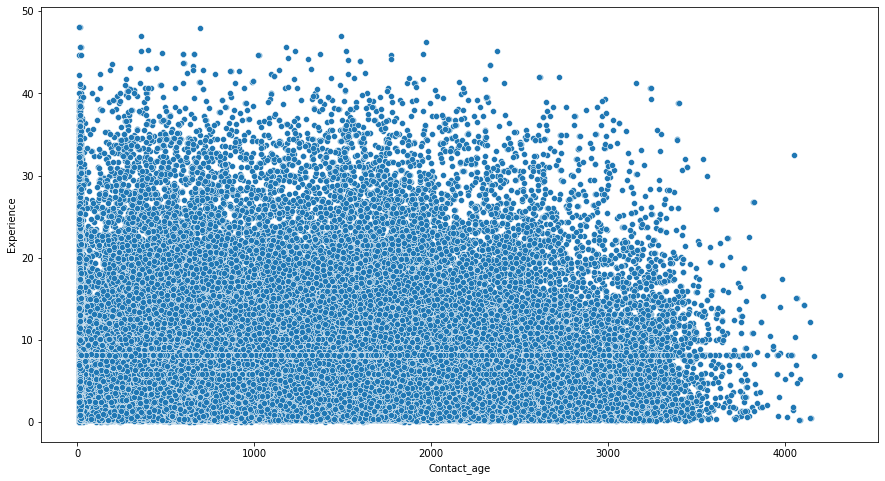

In [112]:
sns.scatterplot(data = df1 , x = 'Contact_age',y='Experience')

# Inference
* Doesn't look other variables will be useful here hence replacing null values with median since it has outliers

In [113]:
df1.Contact_age.fillna(df1.Contact_age.median(),inplace=True)

In [216]:
# Dropping c2_rated
df1.drop(columns=['c2_rated'],inplace=True)

In [217]:
df1.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,Contact_age,Product_bought,Default,Loan_amt_binned,Annuity_amt_binned,Age_binned,Home_Appliances_binned,Experience_binned,Compensation_binned
0,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,1.0,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,18.0,2.0,1.0,upper_whisk,upper_whisk,q3,None,lower_whisk,q3
1,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,306.0,4.0,0.0,lower_whisk,q3,q3,Lower_Out,q1,upper_whisk
2,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,8.2,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,281.0,4.0,0.0,lower_whisk,lower_whisk,upper_whisk,lower_whisk,None,lower_whisk
3,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,0.561,20.0,4.0,0.0,lower_whisk,lower_whisk,q1,Lower_Out,q3,lower_whisk
4,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,0.200,2339.0,6.0,0.0,upper_whisk,upper_whisk,lower_whisk,Lower_Out,q3,upper_whisk


In [218]:
df1.drop(columns=['Compensation_binned','Experience_binned','Age_binned','Loan_amt_binned','Home_Appliances_binned','Annuity_amt_binned'],inplace=True)

In [219]:
# df1.to_csv('df1_ver_2.csv',index=False)

# Changing data type for wrongly typed variables

In [221]:
df1.Company_Rating = df1.Company_Rating.astype(np.object_)

In [222]:
info['num'] = 'Numerical columns in data'

In [223]:
info['cat'] = 'Categorical columns in data'

In [224]:
num = list(df1.select_dtypes(include=np.number).columns)
num.remove('Default')

In [225]:
cat = list(df1.select_dtypes(include=np.object_).columns)

In [226]:
# Unique values and their percentage for categorical variables
for i in cat:
    print(f'\t\t\t{i}')
    print(f'Number of unique:',len(df1[i].unique()))
    print(np.round(df1[i].value_counts(normalize=True)*100,2))
    print()
    print('-'*100)

			Vehicle_Status
Number of unique: 2
N    67.96
Y    32.04
Name: Vehicle_Status, dtype: float64

----------------------------------------------------------------------------------------------------
			Job_Type
Number of unique: 3
IT        58.01
Non-IT    22.58
Govt.     19.41
Name: Job_Type, dtype: float64

----------------------------------------------------------------------------------------------------
			Default_hist
Number of unique: 2
ndf    89.98
df     10.02
Name: Default_hist, dtype: float64

----------------------------------------------------------------------------------------------------
			Prop_List
Number of unique: 3
One             70.64
Morethan_One    19.53
None             9.83
Name: Prop_List, dtype: float64

----------------------------------------------------------------------------------------------------
			Region_Type
Number of unique: 3
Metro    81.18
Rural    16.81
other     2.01
Name: Region_Type, dtype: float64

-----------------------------------------

In [227]:
# The target is highly imbalanced 
# In this situation SMOTE can be applied
df1.Default.value_counts(normalize=True)*100

0.0    73.569918
1.0    26.430082
Name: Default, dtype: float64

In [228]:
# Replacing Spelling
df1.Day_Process = df1.Day_Process.replace(list(df1.Day_Process.unique()),['SAT','WED','MON','SUN','TUE','THUR','FRI'])

# 2 Exploratory Data Analyis

# UNIVARIATE ANALYSIS (Categorical Variables)

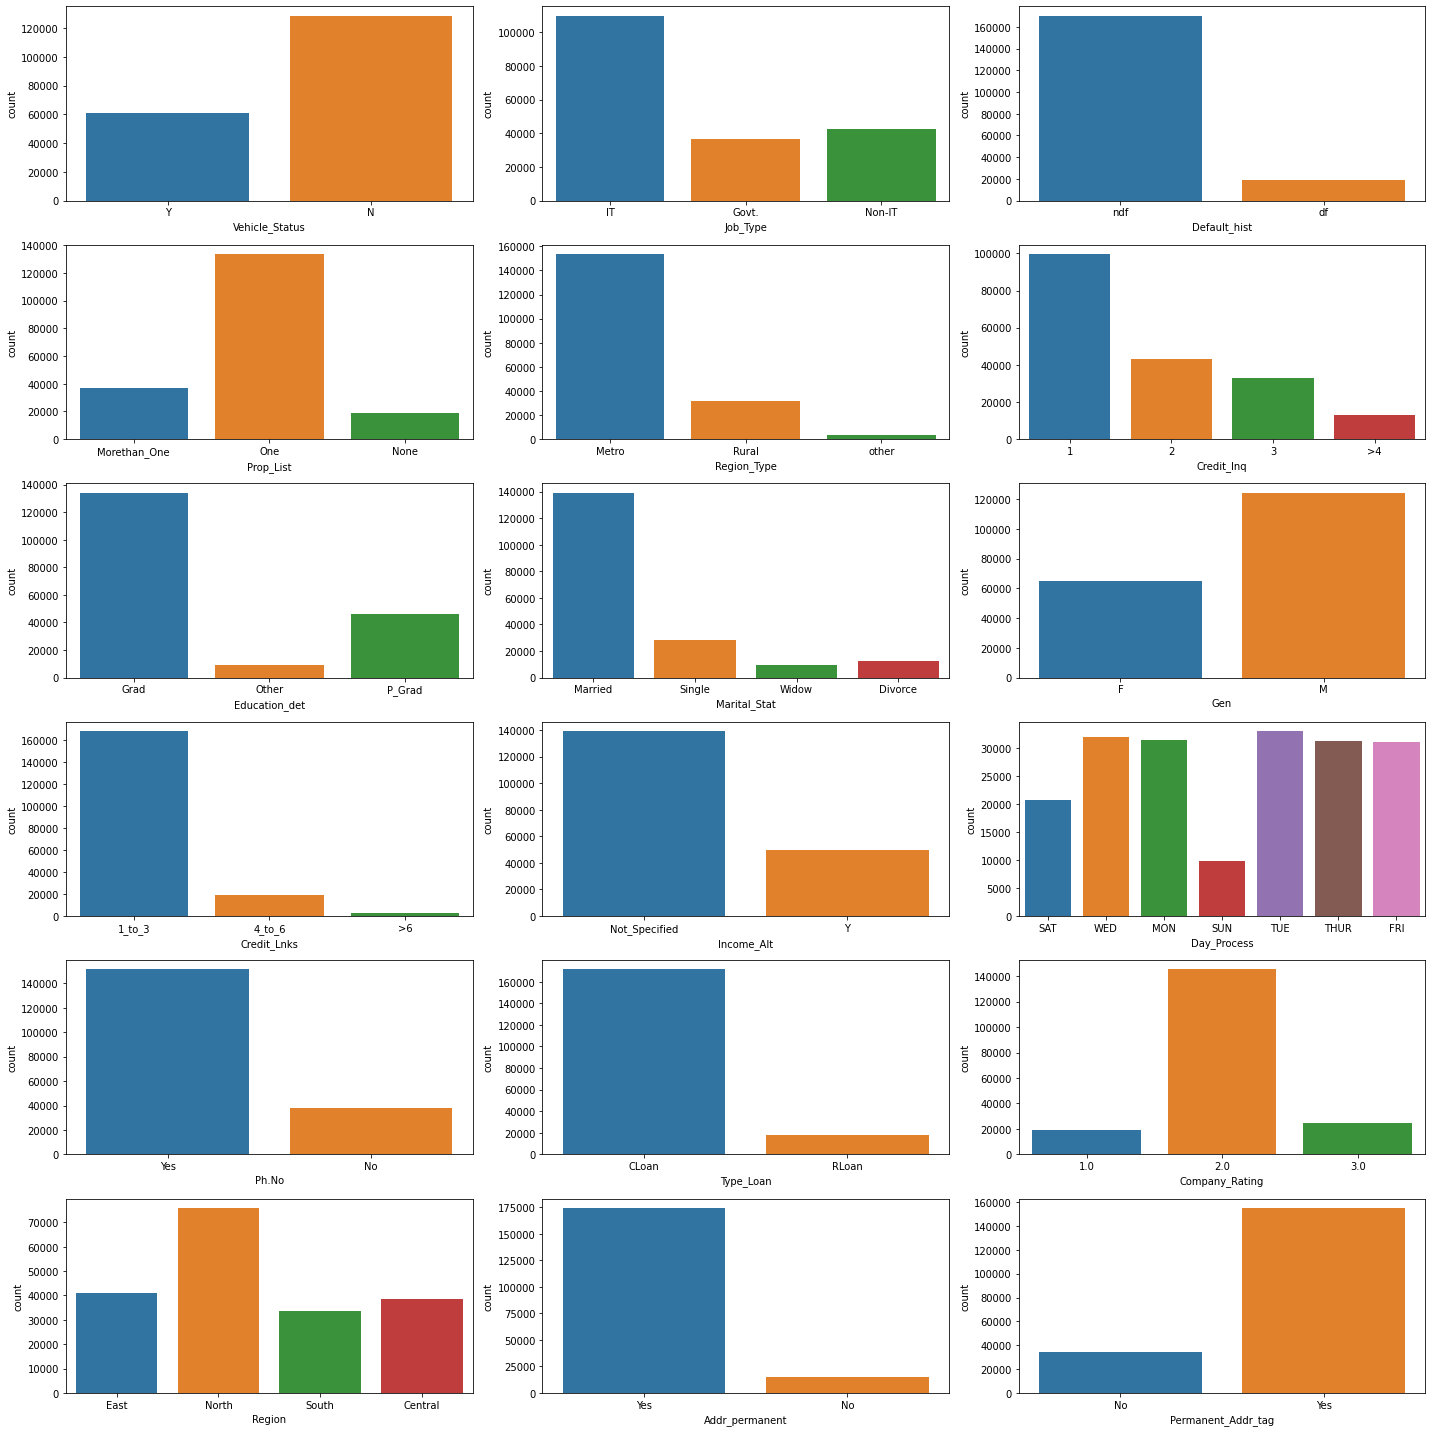

In [894]:
c=1
for i in cat:
    plt.subplot(6,3,c)
    sns.countplot(data=df1,x = i)
    c+=1
plt.tight_layout()
plt.show()

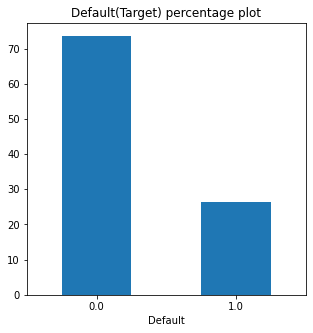

In [917]:
plt.figure(figsize=[5,5])
np.round(df1.Default.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.xlabel('Default')
plt.title('Default(Target) percentage plot')
plt.xticks(rotation=0)
plt.show()

# Inference
* **Vehicle_Status**: There are more applicant with *No vehicle* then *having vehicle* in the data.
* **Job_Type**: Most of the applicant in the data work in *IT sector* and least applicants work in *Govt. sector*.
* **Default_hist**: Most of the applicant has *defaulted* in the past the data.
* **Prop_List**: Almost(*70.64%*) all the applicant has listed *One property* and very few has listed *Morethan_One(19.53%)* and remaining *9.83%* have not listed any property.
* **Region_Type**: Almost all of the applicants are from *Metro* cities and very little are from *Rural* areas. There are even few applicants in *other* calss.
* **Credit_Inq**: Half the applicants(*52.66%*) have had at least *1 credit inquiry*. Very few applicants(*6.87%*) have had more than *4 credit inquiry*.
* **Education_det**: Almost all the applicants(*96.36%) have *Graduation/Post Graduation*.
* **Marital_Stat**: *73.64%* of the Applicants are *Married*. *14.80%* Applicants are *Single* and remaining are either Divorced or *Widowed*.
* **Gen**: There are *more Males* in the data than *Females*
* **Credit_Lnks**: Applicant with *1_to_3*, *4_to_6* and *'>6'* credit links are* 88.78%*,* 9.99%* and *1.23%* respactively.
* **Income_Alt**: Most of the Applicant has given any information and remaining have given a positive response.
* **Day_Process**: Application Process days are *well distributed except on weekends*.
* **Ph.No**: Most of the applicants have *tagged their phone number*
* **Type_Loan**: Most of the applicants have *CLoan(90.58%)* and very few have *RLoan(9.42%)* in the data.
* **Company_Rating**: Most applicant work in *2.0* rated firms and remaining work in either *1.0 or 3.0* rated firms.
* **Region**: Most of the applicants are from *North Region*(40.15%) remaining regions are well distributed with South having the least applicants.
* **Addr_permanent**: Very few applicants' address have *not been varified*.
* **Permanent_Addr_tag**: Mostly permanent address have been tagged in the applicantion.
* **Default(TARGET)**: In the data *26.43%* applicants have *defaulted* and *73.57%* applicants have *not defaulted*.

# UNIVARIATE ANALYSIS (Numerical Variables)

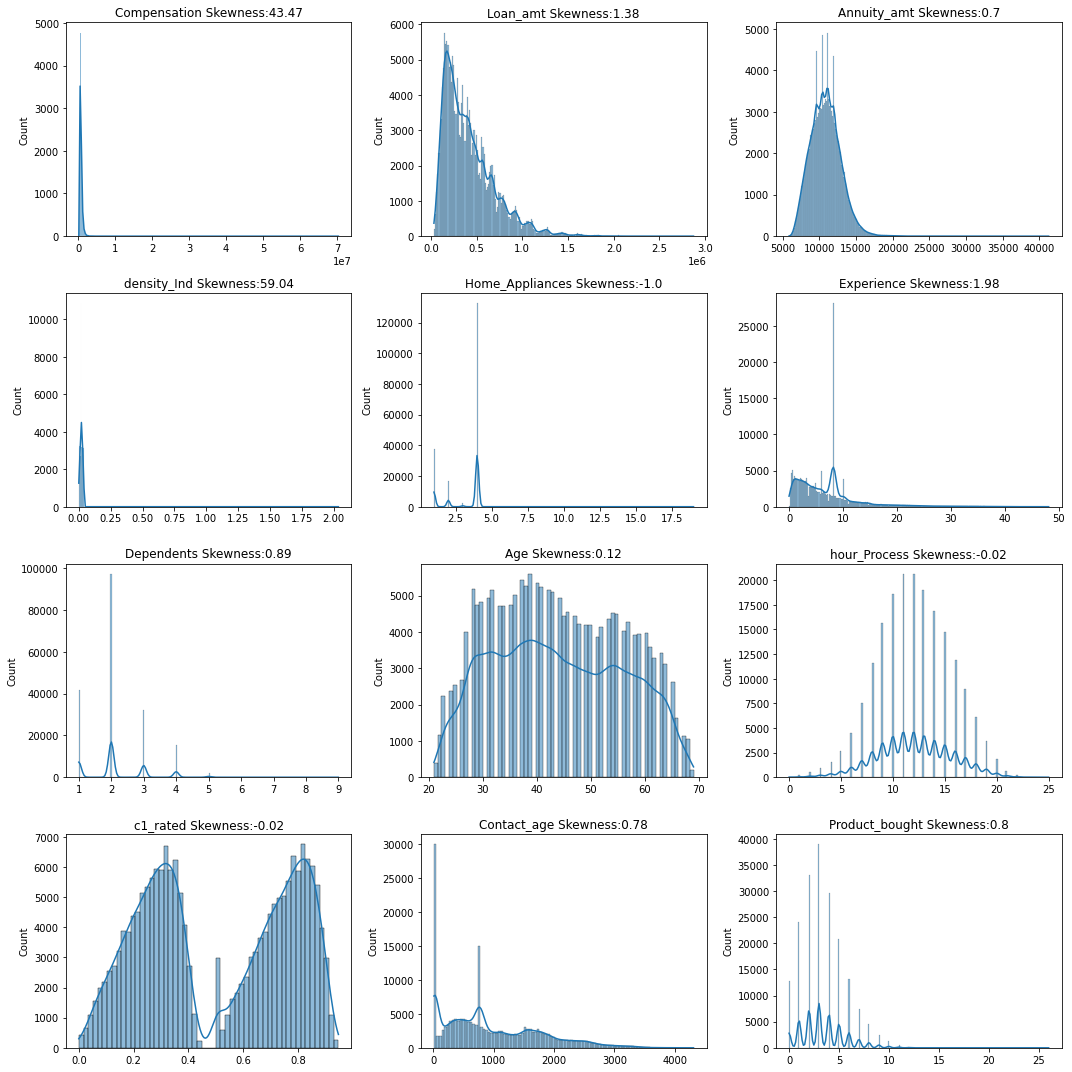

In [232]:
c=1
plt.figure(figsize=[15,15])
for i in num:
    plt.subplot(4,3,c)
    sns.histplot(data = df1 , x = i , kde= True)
    c+=1
    plt.title(f'{i} Skewness:{round(df1[i].skew(),2)}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Compensation', ylabel='Count'>

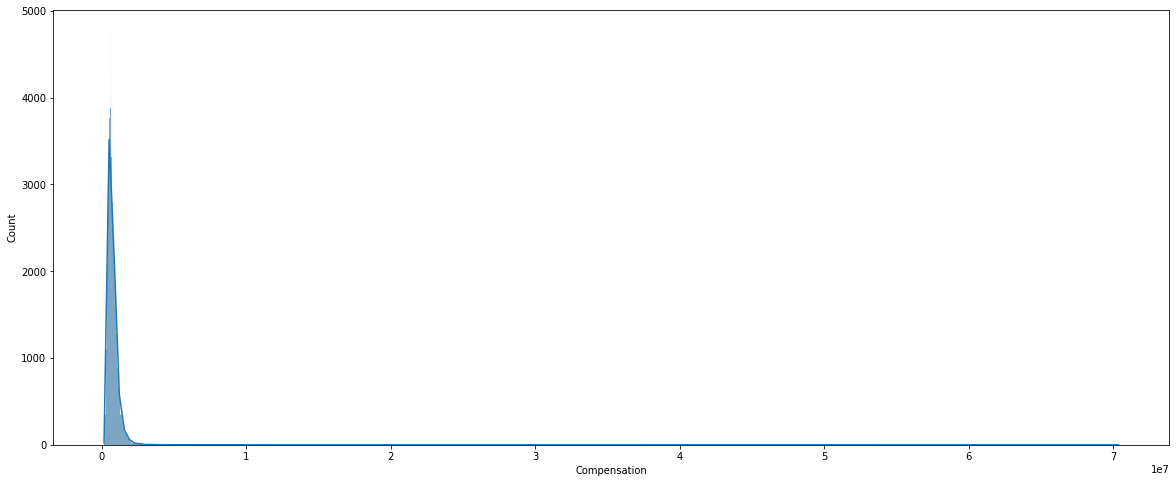

In [238]:
plt.figure(figsize=[20,8])
sns.histplot(data=df1,x='Compensation',kde=True)

# Inference Bellow Output talks about the range of variables and their skewness

In [249]:
for i in num:
    s = round(df1[i].skew(),3)
    max_=round(df1[i].max(),3)
    min_=round(df1[i].min(),3)
    print(f'{i} ranges from {min_} to {max_}')
    if s<=1 and s>0:
        print(f'{i} is slightly positively skewed(skeweness = {s}). It can be said that it is near normal.')
    elif s>=-1 and s<0:
        print(f'{i} is slighly negatively skewed(skeweness = {s}). It can be said that it is near normal.')
    elif s>1 and s<=10:
        print(f'{i} is positively skewed(skeweness{s}).')
    elif s<-1 and s>=-10:
        print(f'{i} is negatively skewed(skeweness{s}).')
    elif s>10:
        print(f'{i} is highly positively skewed(skeweness = {s}).')
    elif s>10:
        print(f'{i} is highly negatively skewed(skeweness = {s}).')
    print('-'*100)
    

Compensation ranges from 148330.0 to 70377021.0
Compensation is highly positively skewed(skeweness = 43.471).
----------------------------------------------------------------------------------------------------
Loan_amt ranges from 34275.0 to 2872142.0
Loan_amt is positively skewed(skeweness1.385).
----------------------------------------------------------------------------------------------------
Annuity_amt ranges from 5852.1 to 41301.0
Annuity_amt is slightly positively skewed(skeweness = 0.697). It can be said that it is near normal.
----------------------------------------------------------------------------------------------------
density_Ind ranges from 0.0 to 2.037
density_Ind is highly positively skewed(skeweness = 59.036).
----------------------------------------------------------------------------------------------------
Home_Appliances ranges from 1.0 to 19.0
Home_Appliances is slighly negatively skewed(skeweness = -0.998). It can be said that it is near normal.
-----------

# Additional Notes:
* **Compensation**: The tail on the right side is very long indicating high number of outliers.
* **Loan_amt**: There is influence of outliers. This variable is dependent on Compensation hence if Compensation has outliers than Loan amount tends to have outliers.
* **Home_Appliances**: Most applicants own 4 number of appliances. It is descrete numerical variable
* **Experience**: Looks bi modal in nature.
* **Dependents**: Most applicants have 2 dependents. It is descrete numerical variable
* **hour_process**: It is very well distributed variable with most application process time between 11 to 12 hours
* **c1_rated**: It is bimodal in nature.
* **Contact_age**: It looks bimodal in nature.
* **Product_boght**: It is descrete numerical variable.

# Bivariate Analysis
## Categorical variables vs Target(Categorical)

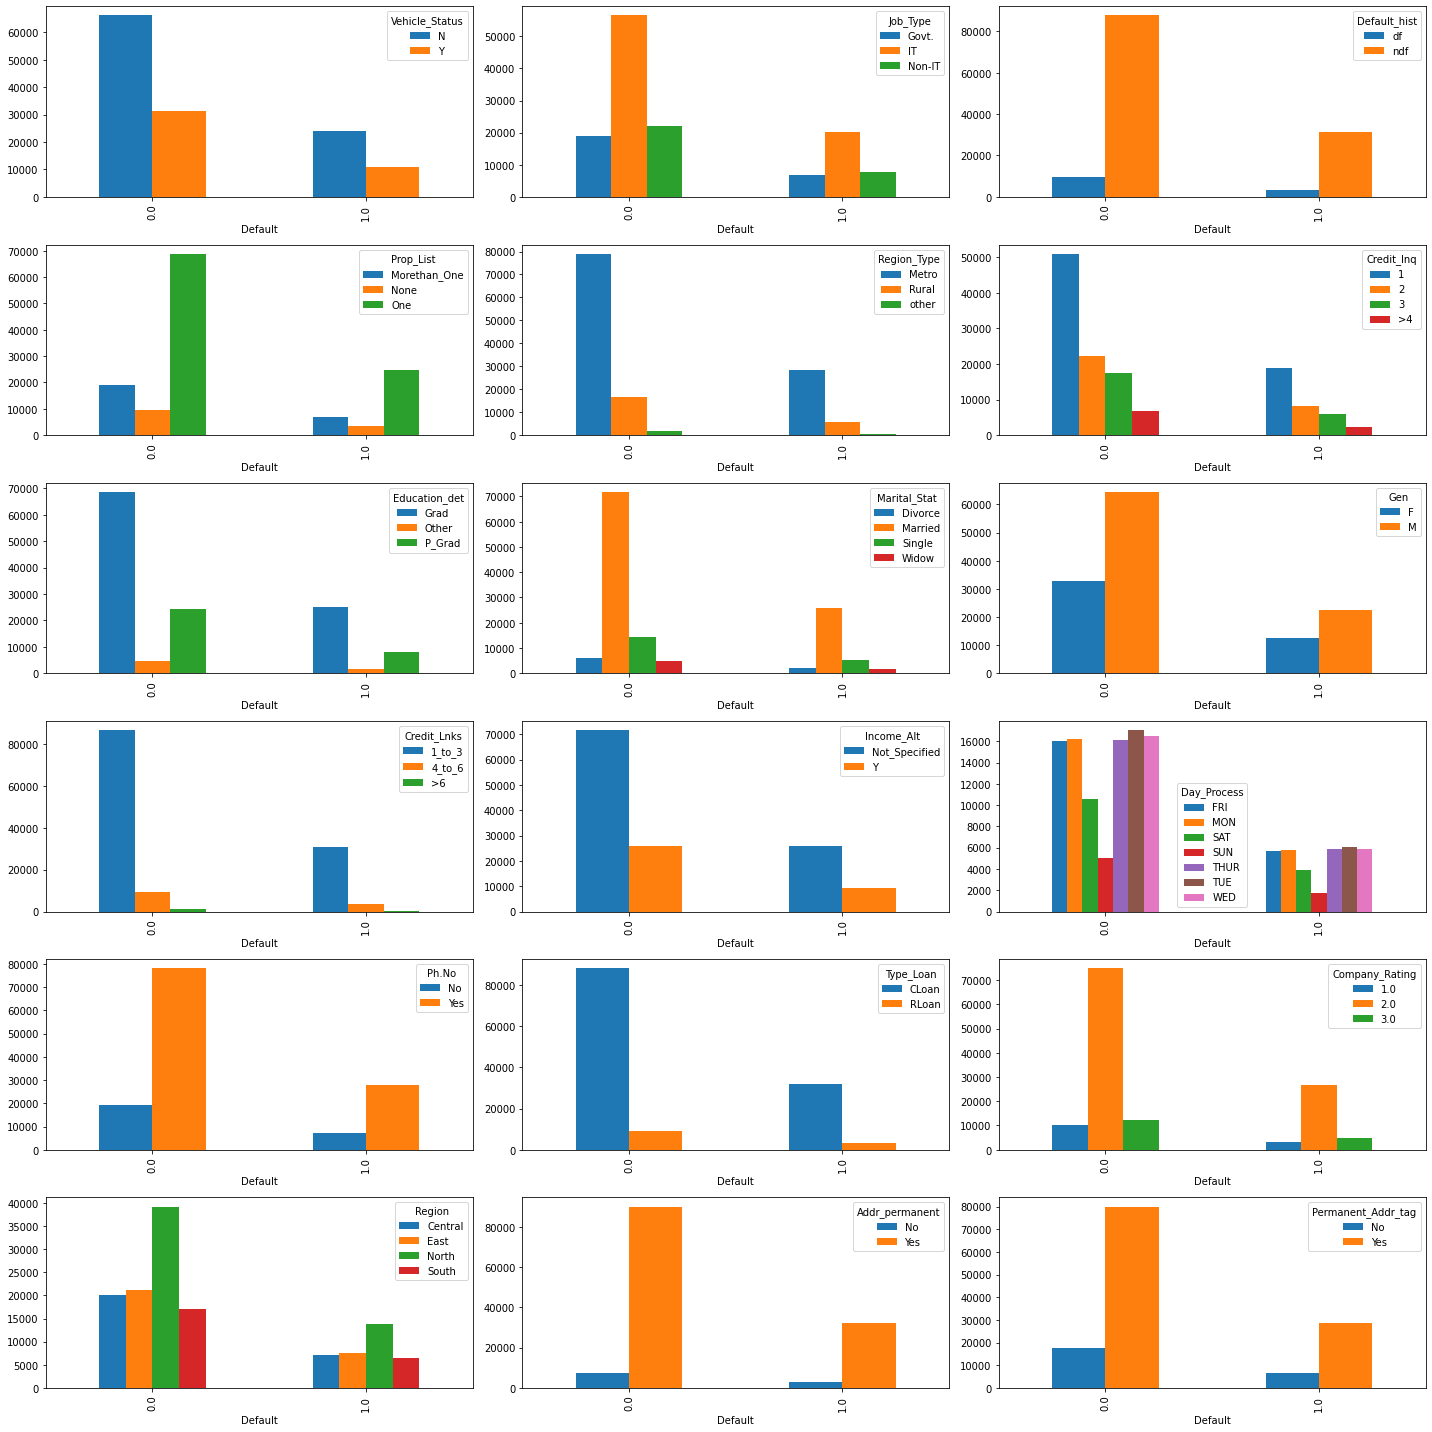

In [278]:
fig, a = plt.subplots(6,3)
plt.rcParams['figure.figsize']=[20,20]
for i,j in zip(cat,a.flatten()):
    pd.crosstab(df1.Default,df1[i]).plot.bar(ax=j)
plt.tight_layout()
plt.show()

# Inference
* All the Destribution are same for all variables for both Default classes.

# Numerical Variabels Vs Target(Categorical)

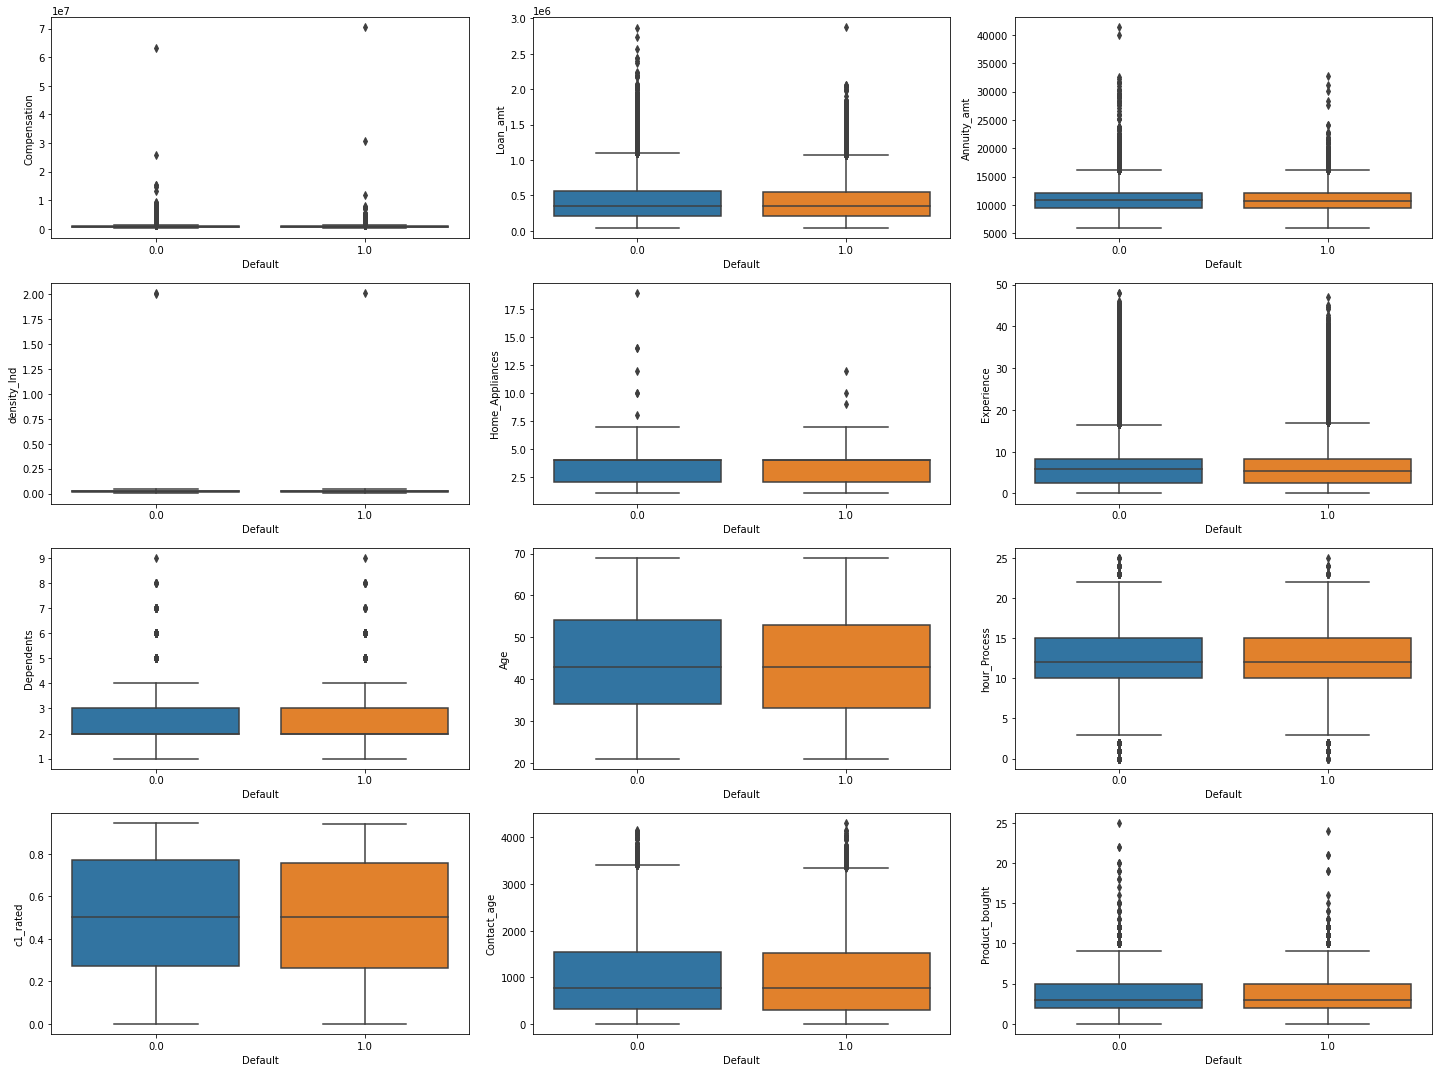

In [273]:
c=1
plt.figure(figsize=[20,15])
for i in num:
    plt.subplot(4,3,c)
    sns.boxplot(data = df1 , y = i ,x = 'Default')
    c+=1
plt.tight_layout()
plt.show()

# Inference
* Both the classes show same destribution for both classes in Default variable

# Multivariate Analysis

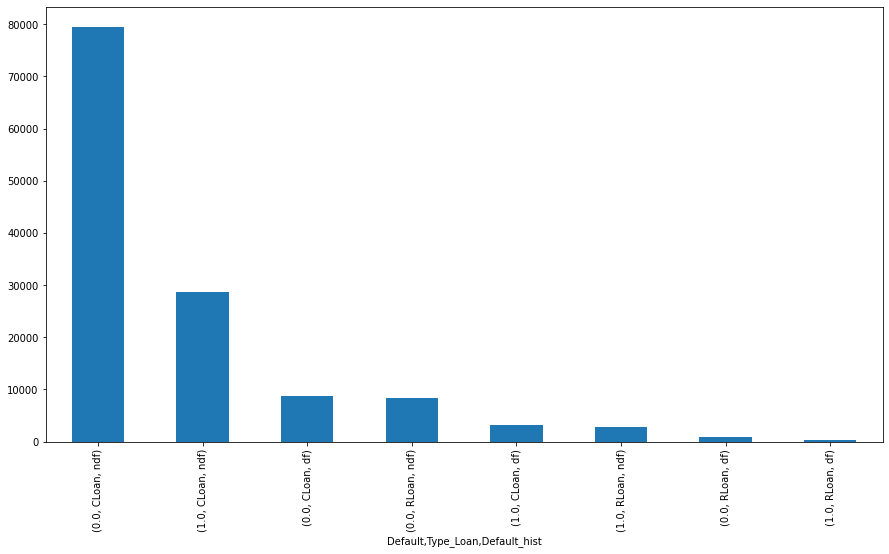

In [309]:
plt.figure(figsize=[15,8])
df1.groupby(['Default','Type_Loan','Default_hist'])['Compensation'].count().sort_values(ascending=False).plot.bar()
plt.show()

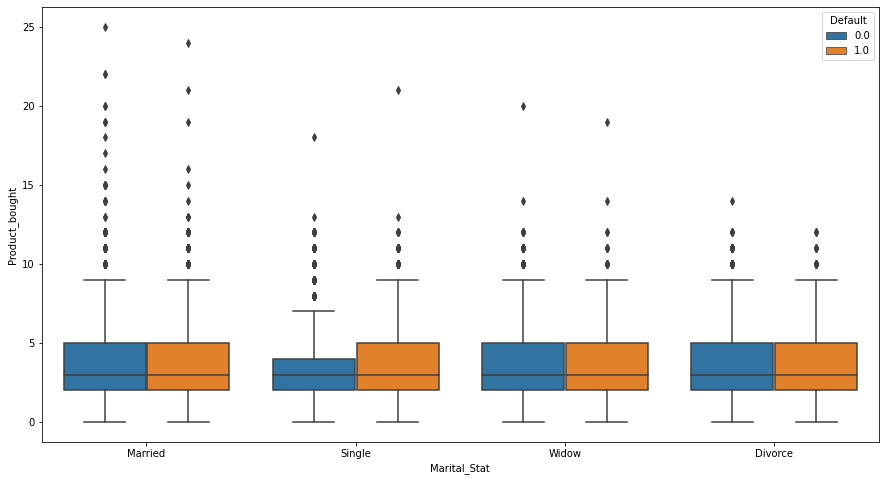

In [327]:
# Type_Loan, Default_hist
plt.rcParams['figure.figsize'] = [15,8]
sns.boxplot(data=df1, y = 'Product_bought' , hue = 'Default' , x ='Marital_Stat')
plt.show()

# Inference
* As seen from Bivariate analysis There is not much difference in destribution even after adding one more variable

In [279]:
df1.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,Contact_age,Product_bought,Default
0,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,1.0,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,18.0,2.0,1.0
1,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,WED,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,306.0,4.0,0.0
2,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,8.2,Not_Specified,MON,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,281.0,4.0,0.0
3,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,WED,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,0.561,20.0,4.0,0.0
4,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,SUN,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,0.200,2339.0,6.0,0.0


# Statistical tests to see the impact of variables on Target

# Categorical variables with target

In [335]:
impact_li = []
no_impact_li = []
for i in cat:
    print(f'Ho: The variable {i} has no impact on Default')
    print(f'Ha: The variable {i} has an impact on Default')
    print()
    stat,pval , dof , exp = stats.chi2_contingency(pd.crosstab(df1.Default,df1[i]))
    pval = round(pval,3)
    if pval<0.05:
        print(f'p value is {pval}. Reject Ho.')
        print(f'Ha: The variable {i} has an impact on Default')
        impact_li.append(i)
    else:
        print(f'p value is {pval}. Fail to reject Ho.')
        print(f'Ha: The variable {i} has no impact on Default')
        no_impact_li.append(i)
    print('-'*100)

Ho: The variable Vehicle_Status has no impact on Default
Ha: The variable Vehicle_Status has an impact on Default

p value is 0.039. Reject Ho.
Ha: The variable Vehicle_Status has an impact on Default
----------------------------------------------------------------------------------------------------
Ho: The variable Job_Type has no impact on Default
Ha: The variable Job_Type has an impact on Default

p value is 0.209. Fail to reject Ho.
Ha: The variable Job_Type has no impact on Default
----------------------------------------------------------------------------------------------------
Ho: The variable Default_hist has no impact on Default
Ha: The variable Default_hist has an impact on Default

p value is 0.848. Fail to reject Ho.
Ha: The variable Default_hist has no impact on Default
----------------------------------------------------------------------------------------------------
Ho: The variable Prop_List has no impact on Default
Ha: The variable Prop_List has an impact on Defaul

In [386]:
info['impact_li'] = 'Variables that pass the test for impact'
info['no_impact_li'] = ' Variables that dont pass the test for impact'

# Numerical Variable with Target

In [369]:
for i in num:
    print(f'Ho: The variable {i} is normally destributed.')
    print(f'Ha: The variable {i} is not normally destributed.')
    print()
    stat,pval = stats.jarque_bera(df1[i])
    if pval<0.05:
        print(f'The pvalue is {pval}. Reject Ho. The data is not normally destributed')
    else:
        print(f'The pvalue is {pval}. Fail to reject Ho. The data is normally destrubuted')
    print('-'*100)

Ho: The variable Compensation is normally destributed.
Ha: The variable Compensation is not normally destributed.

The pvalue is 0.0. Reject Ho. The data is not normally destributed
----------------------------------------------------------------------------------------------------
Ho: The variable Loan_amt is normally destributed.
Ha: The variable Loan_amt is not normally destributed.

The pvalue is 0.0. Reject Ho. The data is not normally destributed
----------------------------------------------------------------------------------------------------
Ho: The variable Annuity_amt is normally destributed.
Ha: The variable Annuity_amt is not normally destributed.

The pvalue is 0.0. Reject Ho. The data is not normally destributed
----------------------------------------------------------------------------------------------------
Ho: The variable density_Ind is normally destributed.
Ha: The variable density_Ind is not normally destributed.

The pvalue is 0.0. Reject Ho. The data is not no

# Here None of the variables have passed the normality test hence using non paramatric test to check the impact of variables on target

In [383]:
for i in num:
    print(f'Ho: The variable {i} has an impact on target.')
    print(f'Ha: The variable {i} dont have an impact on target.')
    print()
    g1 = df1.loc[df1.Default==0.0,i]
    g2 = df1.loc[df1.Default==1.0,i]
    stat,pval = stats.kruskal(g1,g2)
    if pval<0.05:
        print(f'The pvalue is {pval}. Reject Ho. The variable {i} dont have an impact on target.')
        no_impact_li.append(i)
    else:
        print(f'The pvalue is {pval}. Fail to reject Ho. The variable {i} has an impact on target.')
        impact_li.append(i)
    print('-'*100)

Ho: The variable Compensation has an impact on target.
Ha: The variable Compensation dont have an impact on target.

The pvalue is 0.5213828673551532. Fail to reject Ho. The variable Compensation has an impact on target.
----------------------------------------------------------------------------------------------------
Ho: The variable Loan_amt has an impact on target.
Ha: The variable Loan_amt dont have an impact on target.

The pvalue is 0.10961326249495157. Fail to reject Ho. The variable Loan_amt has an impact on target.
----------------------------------------------------------------------------------------------------
Ho: The variable Annuity_amt has an impact on target.
Ha: The variable Annuity_amt dont have an impact on target.

The pvalue is 0.219499309530427. Fail to reject Ho. The variable Annuity_amt has an impact on target.
----------------------------------------------------------------------------------------------------
Ho: The variable density_Ind has an impact on tar

In [385]:
impact_li,no_impact_li

(['Vehicle_Status',
  'Credit_Inq',
  'Education_det',
  'Gen',
  'Credit_Lnks',
  'Ph.No',
  'Type_Loan',
  'Company_Rating',
  'Region',
  'Addr_permanent',
  'Compensation',
  'Loan_amt',
  'Annuity_amt',
  'density_Ind',
  'Home_Appliances',
  'Dependents'],
 ['Job_Type',
  'Default_hist',
  'Prop_List',
  'Region_Type',
  'Marital_Stat',
  'Income_Alt',
  'Day_Process',
  'Permanent_Addr_tag',
  'Experience',
  'Age',
  'hour_Process',
  'c1_rated',
  'Contact_age',
  'Product_bought'])

# Data Preparation for model building

In [387]:
impact_li.extend(['Default_hist','c1_rated'])
impact_li.remove('Gen')
impact_li.remove('Ph.No')
impact_li.remove('density_Ind')

In [662]:
impact_li

['Vehicle_Status',
 'Credit_Inq',
 'Education_det',
 'Credit_Lnks',
 'Type_Loan',
 'Company_Rating',
 'Region',
 'Addr_permanent',
 'Compensation',
 'Loan_amt',
 'Annuity_amt',
 'Home_Appliances',
 'Dependents',
 'Default_hist',
 'c1_rated']

In [425]:
df2 = df1[impact_li+['Default']]

In [589]:
# df1.to_csv('df1_ver_2.csv',index=False)

In [391]:
info['df2'] = 'DataFrame with removed variables basis statistical analysis.'

In [ ]:
# scale
# smote

In [431]:
num = list(df2.select_dtypes(include=np.number).columns)

In [432]:
cat = list(df2.select_dtypes(include=np.object_).columns)

In [433]:
 cat_dummy = pd.get_dummies(df2[cat],drop_first=True)

D:\python\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [434]:
cat_dummy.head()

,Vehicle_Status_Y,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Credit_Lnks_4_to_6,Credit_Lnks_>6,Type_Loan_RLoan,Company_Rating_2.0,Company_Rating_3.0,Region_East,Region_North,Region_South,Addr_permanent_Yes,Default_hist_ndf
0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1
3,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
4,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [437]:
df2 = pd.concat([df2[num],cat_dummy],axis=1)

In [450]:
train_df = df2[:train.shape[0]]

In [451]:
test_df = df2[train.shape[0]:]

In [456]:
train_df.head()

,Compensation,Loan_amt,Annuity_amt,Home_Appliances,Dependents,c1_rated,Default,Vehicle_Status_Y,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Credit_Lnks_4_to_6,Credit_Lnks_>6,Type_Loan_RLoan,Company_Rating_2.0,Company_Rating_3.0,Region_East,Region_North,Region_South,Addr_permanent_Yes,Default_hist_ndf
0,801850.0,658040.0,13816.52,1.0,3.0,0.077,1.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,884222.0,198075.0,11173.06,1.0,3.0,0.184,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,284120.0,101056.0,8390.40,4.0,2.0,0.538,0.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1
3,341874.0,179008.0,7184.13,2.0,4.0,0.561,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
4,1259895.0,573715.0,13212.77,1.0,3.0,0.200,0.0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [459]:
test_df.head()

,Compensation,Loan_amt,Annuity_amt,Home_Appliances,Dependents,c1_rated,Default,Vehicle_Status_Y,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Credit_Lnks_4_to_6,Credit_Lnks_>6,Type_Loan_RLoan,Company_Rating_2.0,Company_Rating_3.0,Region_East,Region_North,Region_South,Addr_permanent_Yes,Default_hist_ndf
132440,653106.0,809400.00,9145.51,1.0,3.0,0.349,NaN,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
132441,434150.0,72618.75,7683.23,4.0,2.0,0.237,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
132442,489060.0,267255.80,9032.85,1.0,3.0,0.111,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
132443,957294.0,623600.00,12838.25,4.0,2.0,0.323,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
132444,1333739.0,529520.00,11799.09,4.0,2.0,0.940,NaN,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1


# Fit the data for numerical variables on train and transform both test and train using this fit to avoid leakage

In [512]:
info['X_train'] = 'Train X'
info['y_train'] = 'Train y'
info['x_train_smote'] = 'Train X with smote'
info['y_train_smote'] = 'Train y with smote'
info['X_test'] = 'Test X'
info['y_test'] = 'Test y'
info['scaled_num'] = 'Transformed Numerical variables same name for test and train'
info['cat_dummy'] = 'DataFrame with dummified categorical variables'

In [465]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_df[num[:-1]])
scaled_num = pd.DataFrame(sc.transform(train_df[num[:-1]]),columns=num[:-1])

In [476]:
X_train = pd.concat([scaled_num , train_df[cat_dummy.columns]],axis=1)

In [477]:
y_train = train_df.Default

In [478]:
X_train.head()

,Compensation,Loan_amt,Annuity_amt,Home_Appliances,Dependents,c1_rated,Vehicle_Status_Y,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Credit_Lnks_4_to_6,Credit_Lnks_>6,Type_Loan_RLoan,Company_Rating_2.0,Company_Rating_3.0,Region_East,Region_North,Region_South,Addr_permanent_Yes,Default_hist_ndf
0,0.130195,0.885543,1.462263,-1.786198,0.929036,-1.607949,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,0.309249,-0.789020,0.162050,-1.786198,0.929036,-1.206969,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,-0.995209,-1.142230,-1.206630,0.628797,-0.171022,0.119636,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1
3,-0.869667,-0.858436,-1.799947,-0.981199,2.029094,0.205828,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
4,1.125859,0.578547,1.165302,-1.786198,0.929036,-1.147010,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [479]:
y_train.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Default, dtype: float64

In [482]:
scaled_num = pd.DataFrame(sc.transform(test_df[num[:-1]]),columns=num[:-1])

In [494]:
X_test = pd.concat([scaled_num,test_df[cat_dummy.columns].reset_index(drop=True)],axis=1)

In [495]:
y_test = test_df.Default.reset_index(drop=True)

In [496]:
X_test.head()

,Compensation,Loan_amt,Annuity_amt,Home_Appliances,Dependents,c1_rated,Vehicle_Status_Y,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Credit_Lnks_4_to_6,Credit_Lnks_>6,Type_Loan_RLoan,Company_Rating_2.0,Company_Rating_3.0,Region_East,Region_North,Region_South,Addr_permanent_Yes,Default_hist_ndf
0,-0.193134,1.436588,-0.835222,-1.786198,0.929036,-0.588636,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,-0.669085,-1.245759,-1.554459,0.628797,-0.171022,-1.008353,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,-0.549725,-0.537158,-0.890635,-1.786198,0.929036,-1.480535,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
3,0.468088,0.760159,0.981091,0.628797,-0.171022,-0.686070,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
4,1.286376,0.417649,0.469969,0.628797,-0.171022,1.626121,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1


In [497]:
y_test.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Default, dtype: float64

In [498]:
# SMOTE the target due to imbalanced data
from imblearn.over_sampling import SMOTE

In [503]:
sm = SMOTE(random_state=10)
x_train_smote , y_train_smote = sm.fit_resample(X_train,y_train)

In [506]:
x_train_smote.shape, y_train_smote.shape

((194872, 22), (194872,))

## 3 Model Building

## Model 1

# RandomForest

In [530]:
from sklearn.ensemble import RandomForestClassifier

In [532]:
rf_base = RandomForestClassifier(random_state=10).fit(X_train,y_train)
rf_base_smote = RandomForestClassifier(random_state=10).fit(x_train_smote,y_train_smote)

y_pred_rf = rf_base.predict(X_train)
y_pred_rf_smote = rf_base_smote.predict(x_train_smote)

In [533]:
print(classification_report(y_train,y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     97436
         1.0       1.00      1.00      1.00     35004

    accuracy                           1.00    132440
   macro avg       1.00      1.00      1.00    132440
weighted avg       1.00      1.00      1.00    132440



In [534]:
print(classification_report(y_train_smote,y_pred_rf_smote))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     97436
         1.0       1.00      1.00      1.00     97436

    accuracy                           1.00    194872
   macro avg       1.00      1.00      1.00    194872
weighted avg       1.00      1.00      1.00    194872



In [567]:
# Overfitted model

In [580]:
y_pred_rf_smote_test = rf_base_smote.predict(X_test)
# csv_maker(y_pred_rf_smote_test,'rf_base_smote')

# Model 2

# GradientBoost

In [540]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

gb_base = GradientBoostingClassifier(random_state=10).fit(X_train,y_train)
gb_base_smote = GradientBoostingClassifier(random_state=10).fit(x_train_smote,y_train_smote)

y_pred_gb = gb_base.predict(X_train)
y_pred_gb_smote = gb_base_smote.predict(x_train_smote)

In [541]:
print(classification_report(y_train,y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     97436
         1.0       1.00      0.00      0.00     35004

    accuracy                           0.74    132440
   macro avg       0.87      0.50      0.42    132440
weighted avg       0.81      0.74      0.62    132440



In [542]:
print(classification_report(y_train_smote,y_pred_gb_smote))

              precision    recall  f1-score   support

         0.0       0.59      0.49      0.53     97436
         1.0       0.56      0.67      0.61     97436

    accuracy                           0.58    194872
   macro avg       0.58      0.58      0.57    194872
weighted avg       0.58      0.58      0.57    194872



In [544]:
y_pred_gb_smote_test = gb_base_smote.predict(X_test)

In [4]:
def csv_maker(y,name):
    '''takes y: y_pred value , name: Name of the csv'''
    return pd.concat([test[['ID']],pd.DataFrame(y)],axis=1).rename({0:'Default'},axis=1).to_csv(f'{name}.csv',index=False)

In [565]:
info['csv_maker'] = 'will generate csv with the name provided'

In [566]:
csv_maker(y_pred_gb_smote_test,'gb_base_smote')

In [581]:
y_pred_gb_test = gb_base.predict(X_test)
csv_maker(y_pred_gb_test,'gb_base')

# ADA booost

In [666]:
ada_base = AdaBoostClassifier(random_state=10).fit(X_train,y_train)
ada_base_smote = AdaBoostClassifier(random_state=10).fit(x_train_smote,y_train_smote)

y_pred_ada = ada_base.predict(X_train)
y_pred_ada_smote = ada_base_smote.predict(x_train_smote)

In [667]:
print(classification_report(y_train,y_pred_ada))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     97436
         1.0       0.64      0.00      0.00     35004

    accuracy                           0.74    132440
   macro avg       0.69      0.50      0.42    132440
weighted avg       0.71      0.74      0.62    132440



In [668]:
print(classification_report(y_train_smote,y_pred_ada_smote))

              precision    recall  f1-score   support

         0.0       0.57      0.49      0.52     97436
         1.0       0.55      0.62      0.58     97436

    accuracy                           0.56    194872
   macro avg       0.56      0.56      0.55    194872
weighted avg       0.56      0.56      0.55    194872



In [572]:
# y_pred_ada_smote_test = ada_base_smote.predict(X_test)
# csv_maker(y_pred_ada_smote_test,'ada_base_smote')

In [579]:
# y_pred_ada_test = ada_base.predict(X_test)
# csv_maker(y_pred_ada_test,'ada_base')

# XGBOOST

In [575]:
from xgboost import XGBClassifier
xgb_base = XGBClassifier(random_state=10).fit(X_train,y_train)
xgb_base_smote = XGBClassifier(random_state=10).fit(x_train_smote,y_train_smote)

y_pred_xgb = xgb_base.predict(X_train)
y_pred_xgb_smote = xgb_base_smote.predict(x_train_smote)

In [576]:
print(classification_report(y_train,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     97436
         1.0       0.97      0.02      0.04     35004

    accuracy                           0.74    132440
   macro avg       0.86      0.51      0.45    132440
weighted avg       0.80      0.74      0.64    132440



In [577]:
print(classification_report(y_train_smote,y_pred_xgb_smote))

              precision    recall  f1-score   support

         0.0       0.70      0.63      0.66     97436
         1.0       0.66      0.72      0.69     97436

    accuracy                           0.68    194872
   macro avg       0.68      0.68      0.68    194872
weighted avg       0.68      0.68      0.68    194872



In [578]:
y_pred_xgb_smote_test = xgb_base_smote.predict(X_test)
# csv_maker(y_pred_xgb_smote_test,'xgb_base_smote')

# Cat boost

In [583]:
from catboost import CatBoostClassifier

In [584]:
cat_base = CatBoostClassifier(random_state=10).fit(X_train,y_train)
cat_base_smote = CatBoostClassifier(random_state=10).fit(x_train_smote,y_train_smote)

y_pred_cat = cat_base.predict(X_train)
y_pred_cat_smote = cat_base_smote.predict(x_train_smote)

Learning rate set to 0.082992
0:	learn: 0.6739099	total: 190ms	remaining: 3m 9s
1:	learn: 0.6579060	total: 218ms	remaining: 1m 48s
2:	learn: 0.6445169	total: 237ms	remaining: 1m 18s
3:	learn: 0.6334055	total: 262ms	remaining: 1m 5s
4:	learn: 0.6241098	total: 287ms	remaining: 57.1s
5:	learn: 0.6163366	total: 312ms	remaining: 51.7s
6:	learn: 0.6098030	total: 334ms	remaining: 47.4s
7:	learn: 0.6044064	total: 359ms	remaining: 44.6s
8:	learn: 0.5999123	total: 384ms	remaining: 42.3s
9:	learn: 0.5961066	total: 412ms	remaining: 40.8s
10:	learn: 0.5929361	total: 437ms	remaining: 39.3s
11:	learn: 0.5902667	total: 461ms	remaining: 38s
12:	learn: 0.5880411	total: 483ms	remaining: 36.6s
13:	learn: 0.5861672	total: 508ms	remaining: 35.8s
14:	learn: 0.5846101	total: 532ms	remaining: 35s
15:	learn: 0.5832904	total: 558ms	remaining: 34.3s
16:	learn: 0.5821867	total: 583ms	remaining: 33.7s
17:	learn: 0.5812719	total: 606ms	remaining: 33.1s
18:	learn: 0.5804929	total: 633ms	remaining: 32.7s
19:	learn: 0.

163:	learn: 0.5713943	total: 4.52s	remaining: 23.1s
164:	learn: 0.5713684	total: 4.55s	remaining: 23s
165:	learn: 0.5713299	total: 4.57s	remaining: 23s
166:	learn: 0.5712929	total: 4.6s	remaining: 22.9s
167:	learn: 0.5712589	total: 4.63s	remaining: 22.9s
168:	learn: 0.5712134	total: 4.65s	remaining: 22.9s
169:	learn: 0.5711658	total: 4.68s	remaining: 22.8s
170:	learn: 0.5711219	total: 4.71s	remaining: 22.8s
171:	learn: 0.5710799	total: 4.74s	remaining: 22.8s
172:	learn: 0.5710399	total: 4.76s	remaining: 22.8s
173:	learn: 0.5709957	total: 4.79s	remaining: 22.8s
174:	learn: 0.5709723	total: 4.82s	remaining: 22.7s
175:	learn: 0.5709238	total: 4.85s	remaining: 22.7s
176:	learn: 0.5708806	total: 4.87s	remaining: 22.7s
177:	learn: 0.5708451	total: 4.9s	remaining: 22.6s
178:	learn: 0.5708085	total: 4.93s	remaining: 22.6s
179:	learn: 0.5707609	total: 4.96s	remaining: 22.6s
180:	learn: 0.5707285	total: 4.98s	remaining: 22.5s
181:	learn: 0.5707007	total: 5.01s	remaining: 22.5s
182:	learn: 0.5706

328:	learn: 0.5653787	total: 8.82s	remaining: 18s
329:	learn: 0.5653429	total: 8.85s	remaining: 18s
330:	learn: 0.5653035	total: 8.88s	remaining: 17.9s
331:	learn: 0.5652571	total: 8.9s	remaining: 17.9s
332:	learn: 0.5652349	total: 8.93s	remaining: 17.9s
333:	learn: 0.5651947	total: 8.95s	remaining: 17.9s
334:	learn: 0.5651515	total: 8.98s	remaining: 17.8s
335:	learn: 0.5651142	total: 9.01s	remaining: 17.8s
336:	learn: 0.5650835	total: 9.03s	remaining: 17.8s
337:	learn: 0.5650402	total: 9.06s	remaining: 17.7s
338:	learn: 0.5650126	total: 9.08s	remaining: 17.7s
339:	learn: 0.5649739	total: 9.11s	remaining: 17.7s
340:	learn: 0.5649336	total: 9.14s	remaining: 17.7s
341:	learn: 0.5648985	total: 9.16s	remaining: 17.6s
342:	learn: 0.5648691	total: 9.19s	remaining: 17.6s
343:	learn: 0.5648387	total: 9.21s	remaining: 17.6s
344:	learn: 0.5648013	total: 9.24s	remaining: 17.5s
345:	learn: 0.5647734	total: 9.26s	remaining: 17.5s
346:	learn: 0.5647374	total: 9.29s	remaining: 17.5s
347:	learn: 0.564

495:	learn: 0.5599766	total: 13.2s	remaining: 13.4s
496:	learn: 0.5599528	total: 13.2s	remaining: 13.3s
497:	learn: 0.5599216	total: 13.2s	remaining: 13.3s
498:	learn: 0.5598886	total: 13.2s	remaining: 13.3s
499:	learn: 0.5598638	total: 13.3s	remaining: 13.3s
500:	learn: 0.5598321	total: 13.3s	remaining: 13.2s
501:	learn: 0.5598170	total: 13.3s	remaining: 13.2s
502:	learn: 0.5597942	total: 13.3s	remaining: 13.2s
503:	learn: 0.5597684	total: 13.4s	remaining: 13.1s
504:	learn: 0.5597302	total: 13.4s	remaining: 13.1s
505:	learn: 0.5597033	total: 13.4s	remaining: 13.1s
506:	learn: 0.5596799	total: 13.4s	remaining: 13.1s
507:	learn: 0.5596510	total: 13.5s	remaining: 13s
508:	learn: 0.5596163	total: 13.5s	remaining: 13s
509:	learn: 0.5595822	total: 13.5s	remaining: 13s
510:	learn: 0.5595541	total: 13.5s	remaining: 12.9s
511:	learn: 0.5595343	total: 13.6s	remaining: 12.9s
512:	learn: 0.5595041	total: 13.6s	remaining: 12.9s
513:	learn: 0.5594849	total: 13.6s	remaining: 12.9s
514:	learn: 0.5594

658:	learn: 0.5550051	total: 17.4s	remaining: 9.01s
659:	learn: 0.5549690	total: 17.4s	remaining: 8.99s
660:	learn: 0.5549363	total: 17.5s	remaining: 8.96s
661:	learn: 0.5549044	total: 17.5s	remaining: 8.93s
662:	learn: 0.5548621	total: 17.5s	remaining: 8.91s
663:	learn: 0.5548527	total: 17.5s	remaining: 8.88s
664:	learn: 0.5548143	total: 17.6s	remaining: 8.85s
665:	learn: 0.5547804	total: 17.6s	remaining: 8.83s
666:	learn: 0.5547482	total: 17.6s	remaining: 8.8s
667:	learn: 0.5547141	total: 17.7s	remaining: 8.77s
668:	learn: 0.5546846	total: 17.7s	remaining: 8.75s
669:	learn: 0.5546634	total: 17.7s	remaining: 8.72s
670:	learn: 0.5546422	total: 17.7s	remaining: 8.69s
671:	learn: 0.5546072	total: 17.8s	remaining: 8.67s
672:	learn: 0.5545867	total: 17.8s	remaining: 8.64s
673:	learn: 0.5545592	total: 17.8s	remaining: 8.61s
674:	learn: 0.5545315	total: 17.8s	remaining: 8.59s
675:	learn: 0.5545004	total: 17.9s	remaining: 8.56s
676:	learn: 0.5544734	total: 17.9s	remaining: 8.54s
677:	learn: 0

823:	learn: 0.5503286	total: 21.7s	remaining: 4.62s
824:	learn: 0.5502956	total: 21.7s	remaining: 4.6s
825:	learn: 0.5502782	total: 21.7s	remaining: 4.57s
826:	learn: 0.5502567	total: 21.7s	remaining: 4.54s
827:	learn: 0.5502286	total: 21.8s	remaining: 4.52s
828:	learn: 0.5502089	total: 21.8s	remaining: 4.49s
829:	learn: 0.5501790	total: 21.8s	remaining: 4.46s
830:	learn: 0.5501556	total: 21.8s	remaining: 4.44s
831:	learn: 0.5501277	total: 21.9s	remaining: 4.41s
832:	learn: 0.5501000	total: 21.9s	remaining: 4.39s
833:	learn: 0.5500705	total: 21.9s	remaining: 4.36s
834:	learn: 0.5500490	total: 21.9s	remaining: 4.33s
835:	learn: 0.5500128	total: 22s	remaining: 4.31s
836:	learn: 0.5499838	total: 22s	remaining: 4.28s
837:	learn: 0.5499648	total: 22s	remaining: 4.25s
838:	learn: 0.5499356	total: 22s	remaining: 4.23s
839:	learn: 0.5499011	total: 22.1s	remaining: 4.2s
840:	learn: 0.5498738	total: 22.1s	remaining: 4.17s
841:	learn: 0.5498551	total: 22.1s	remaining: 4.15s
842:	learn: 0.5498142	

984:	learn: 0.5460765	total: 25.8s	remaining: 393ms
985:	learn: 0.5460516	total: 25.8s	remaining: 367ms
986:	learn: 0.5460257	total: 25.9s	remaining: 341ms
987:	learn: 0.5460094	total: 25.9s	remaining: 314ms
988:	learn: 0.5459758	total: 25.9s	remaining: 288ms
989:	learn: 0.5459615	total: 25.9s	remaining: 262ms
990:	learn: 0.5459394	total: 26s	remaining: 236ms
991:	learn: 0.5459106	total: 26s	remaining: 210ms
992:	learn: 0.5458731	total: 26s	remaining: 183ms
993:	learn: 0.5458414	total: 26.1s	remaining: 157ms
994:	learn: 0.5458260	total: 26.1s	remaining: 131ms
995:	learn: 0.5458008	total: 26.1s	remaining: 105ms
996:	learn: 0.5457783	total: 26.1s	remaining: 78.6ms
997:	learn: 0.5457456	total: 26.2s	remaining: 52.4ms
998:	learn: 0.5457251	total: 26.2s	remaining: 26.2ms
999:	learn: 0.5456928	total: 26.2s	remaining: 0us
Learning rate set to 0.097872
0:	learn: 0.6922074	total: 36ms	remaining: 35.9s
1:	learn: 0.6914174	total: 70.5ms	remaining: 35.2s
2:	learn: 0.6907781	total: 104ms	remaining:

147:	learn: 0.6661815	total: 5.12s	remaining: 29.5s
148:	learn: 0.6660523	total: 5.15s	remaining: 29.4s
149:	learn: 0.6659742	total: 5.18s	remaining: 29.4s
150:	learn: 0.6659311	total: 5.21s	remaining: 29.3s
151:	learn: 0.6658701	total: 5.25s	remaining: 29.3s
152:	learn: 0.6658213	total: 5.28s	remaining: 29.2s
153:	learn: 0.6657602	total: 5.31s	remaining: 29.2s
154:	learn: 0.6656604	total: 5.35s	remaining: 29.1s
155:	learn: 0.6655781	total: 5.38s	remaining: 29.1s
156:	learn: 0.6654940	total: 5.41s	remaining: 29.1s
157:	learn: 0.6654196	total: 5.45s	remaining: 29s
158:	learn: 0.6653062	total: 5.49s	remaining: 29s
159:	learn: 0.6652217	total: 5.52s	remaining: 29s
160:	learn: 0.6651660	total: 5.55s	remaining: 28.9s
161:	learn: 0.6650845	total: 5.59s	remaining: 28.9s
162:	learn: 0.6650134	total: 5.62s	remaining: 28.9s
163:	learn: 0.6649763	total: 5.66s	remaining: 28.8s
164:	learn: 0.6648998	total: 5.69s	remaining: 28.8s
165:	learn: 0.6648159	total: 5.73s	remaining: 28.8s
166:	learn: 0.6647

307:	learn: 0.6554257	total: 10.5s	remaining: 23.6s
308:	learn: 0.6553727	total: 10.5s	remaining: 23.5s
309:	learn: 0.6553136	total: 10.6s	remaining: 23.5s
310:	learn: 0.6551863	total: 10.6s	remaining: 23.5s
311:	learn: 0.6551479	total: 10.6s	remaining: 23.5s
312:	learn: 0.6550861	total: 10.7s	remaining: 23.4s
313:	learn: 0.6550422	total: 10.7s	remaining: 23.4s
314:	learn: 0.6549685	total: 10.8s	remaining: 23.4s
315:	learn: 0.6549279	total: 10.8s	remaining: 23.3s
316:	learn: 0.6548711	total: 10.8s	remaining: 23.3s
317:	learn: 0.6548160	total: 10.8s	remaining: 23.3s
318:	learn: 0.6547756	total: 10.9s	remaining: 23.2s
319:	learn: 0.6547296	total: 10.9s	remaining: 23.2s
320:	learn: 0.6546854	total: 10.9s	remaining: 23.1s
321:	learn: 0.6546371	total: 11s	remaining: 23.1s
322:	learn: 0.6545847	total: 11s	remaining: 23.1s
323:	learn: 0.6545454	total: 11s	remaining: 23s
324:	learn: 0.6544746	total: 11.1s	remaining: 23s
325:	learn: 0.6544217	total: 11.1s	remaining: 23s
326:	learn: 0.6543783	to

468:	learn: 0.6475168	total: 15.7s	remaining: 17.8s
469:	learn: 0.6474942	total: 15.8s	remaining: 17.8s
470:	learn: 0.6474716	total: 15.8s	remaining: 17.7s
471:	learn: 0.6474175	total: 15.8s	remaining: 17.7s
472:	learn: 0.6473723	total: 15.8s	remaining: 17.7s
473:	learn: 0.6473026	total: 15.9s	remaining: 17.6s
474:	learn: 0.6472557	total: 15.9s	remaining: 17.6s
475:	learn: 0.6472067	total: 15.9s	remaining: 17.6s
476:	learn: 0.6471524	total: 16s	remaining: 17.5s
477:	learn: 0.6471159	total: 16s	remaining: 17.5s
478:	learn: 0.6470905	total: 16s	remaining: 17.4s
479:	learn: 0.6470394	total: 16.1s	remaining: 17.4s
480:	learn: 0.6469812	total: 16.1s	remaining: 17.4s
481:	learn: 0.6469470	total: 16.1s	remaining: 17.3s
482:	learn: 0.6468908	total: 16.2s	remaining: 17.3s
483:	learn: 0.6468524	total: 16.2s	remaining: 17.3s
484:	learn: 0.6468114	total: 16.2s	remaining: 17.2s
485:	learn: 0.6467657	total: 16.3s	remaining: 17.2s
486:	learn: 0.6467060	total: 16.3s	remaining: 17.2s
487:	learn: 0.6466

630:	learn: 0.6408712	total: 21.1s	remaining: 12.4s
631:	learn: 0.6408389	total: 21.2s	remaining: 12.3s
632:	learn: 0.6408047	total: 21.2s	remaining: 12.3s
633:	learn: 0.6407743	total: 21.2s	remaining: 12.3s
634:	learn: 0.6407581	total: 21.3s	remaining: 12.2s
635:	learn: 0.6407320	total: 21.3s	remaining: 12.2s
636:	learn: 0.6407077	total: 21.3s	remaining: 12.2s
637:	learn: 0.6406647	total: 21.4s	remaining: 12.1s
638:	learn: 0.6406274	total: 21.4s	remaining: 12.1s
639:	learn: 0.6405991	total: 21.4s	remaining: 12.1s
640:	learn: 0.6405651	total: 21.5s	remaining: 12s
641:	learn: 0.6405365	total: 21.5s	remaining: 12s
642:	learn: 0.6404988	total: 21.5s	remaining: 12s
643:	learn: 0.6404678	total: 21.6s	remaining: 11.9s
644:	learn: 0.6404358	total: 21.6s	remaining: 11.9s
645:	learn: 0.6403919	total: 21.6s	remaining: 11.9s
646:	learn: 0.6403575	total: 21.7s	remaining: 11.8s
647:	learn: 0.6403258	total: 21.7s	remaining: 11.8s
648:	learn: 0.6402988	total: 21.7s	remaining: 11.8s
649:	learn: 0.6402

790:	learn: 0.6354000	total: 26.2s	remaining: 6.93s
791:	learn: 0.6353712	total: 26.3s	remaining: 6.9s
792:	learn: 0.6353327	total: 26.3s	remaining: 6.87s
793:	learn: 0.6353132	total: 26.3s	remaining: 6.83s
794:	learn: 0.6352875	total: 26.4s	remaining: 6.8s
795:	learn: 0.6352394	total: 26.4s	remaining: 6.77s
796:	learn: 0.6352074	total: 26.4s	remaining: 6.73s
797:	learn: 0.6351711	total: 26.5s	remaining: 6.7s
798:	learn: 0.6351433	total: 26.5s	remaining: 6.67s
799:	learn: 0.6351083	total: 26.5s	remaining: 6.63s
800:	learn: 0.6350672	total: 26.6s	remaining: 6.6s
801:	learn: 0.6350094	total: 26.6s	remaining: 6.57s
802:	learn: 0.6349828	total: 26.6s	remaining: 6.53s
803:	learn: 0.6349752	total: 26.7s	remaining: 6.5s
804:	learn: 0.6349454	total: 26.7s	remaining: 6.46s
805:	learn: 0.6349229	total: 26.7s	remaining: 6.43s
806:	learn: 0.6348846	total: 26.8s	remaining: 6.4s
807:	learn: 0.6348578	total: 26.8s	remaining: 6.36s
808:	learn: 0.6348198	total: 26.8s	remaining: 6.33s
809:	learn: 0.6347

951:	learn: 0.6302224	total: 31.3s	remaining: 1.58s
952:	learn: 0.6302025	total: 31.4s	remaining: 1.55s
953:	learn: 0.6301891	total: 31.4s	remaining: 1.51s
954:	learn: 0.6301572	total: 31.4s	remaining: 1.48s
955:	learn: 0.6301223	total: 31.4s	remaining: 1.45s
956:	learn: 0.6300924	total: 31.5s	remaining: 1.41s
957:	learn: 0.6300586	total: 31.5s	remaining: 1.38s
958:	learn: 0.6300270	total: 31.5s	remaining: 1.35s
959:	learn: 0.6299993	total: 31.6s	remaining: 1.31s
960:	learn: 0.6299521	total: 31.6s	remaining: 1.28s
961:	learn: 0.6299235	total: 31.6s	remaining: 1.25s
962:	learn: 0.6298862	total: 31.7s	remaining: 1.22s
963:	learn: 0.6298462	total: 31.7s	remaining: 1.18s
964:	learn: 0.6298069	total: 31.8s	remaining: 1.15s
965:	learn: 0.6297797	total: 31.8s	remaining: 1.12s
966:	learn: 0.6297486	total: 31.8s	remaining: 1.09s
967:	learn: 0.6297246	total: 31.9s	remaining: 1.05s
968:	learn: 0.6296964	total: 31.9s	remaining: 1.02s
969:	learn: 0.6296768	total: 31.9s	remaining: 988ms
970:	learn: 

In [585]:
print(classification_report(y_train,y_pred_cat))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     97436
         1.0       0.99      0.02      0.03     35004

    accuracy                           0.74    132440
   macro avg       0.87      0.51      0.44    132440
weighted avg       0.81      0.74      0.63    132440



In [586]:
print(classification_report(y_train_smote,y_pred_cat_smote))

              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63     97436
         1.0       0.63      0.70      0.67     97436

    accuracy                           0.65    194872
   macro avg       0.65      0.65      0.65    194872
weighted avg       0.65      0.65      0.65    194872



In [587]:
y_pred_cat_smote_test = cat_base_smote.predict(X_test)
# csv_maker(y_pred_cat_smote_test,'cat_base_smote')

# Model 3

# GaussianNB

In [613]:
from sklearn.naive_bayes import GaussianNB

In [615]:
gnb_base = GaussianNB().fit(X_train,y_train)
gnb_base_smote = GaussianNB().fit(x_train_smote,y_train_smote)

y_pred_gnb = gnb_base.predict(X_train)
y_pred_gnb_smote = gnb_base_smote.predict(x_train_smote)

In [616]:
print(classification_report(y_train,y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84     97436
         1.0       0.29      0.02      0.04     35004

    accuracy                           0.73    132440
   macro avg       0.51      0.50      0.44    132440
weighted avg       0.62      0.73      0.63    132440



In [617]:
print(classification_report(y_train_smote,y_pred_gnb_smote))

              precision    recall  f1-score   support

         0.0       0.57      0.26      0.36     97436
         1.0       0.52      0.80      0.63     97436

    accuracy                           0.53    194872
   macro avg       0.55      0.53      0.49    194872
weighted avg       0.55      0.53      0.49    194872



In [618]:
y_pred_gnb_smote_test = gnb_base_smote.predict(X_test)
# csv_maker(y_pred_gnb_smote_test,'gnb_base_smote')

# So far best model is GaussianNB WITH SMOTE.
# Paramater Tuning for this model

In [119]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [657]:
from sklearn.model_selection import GridSearchCV
gnb_tuned_smote = GaussianNB()
gd = GridSearchCV(estimator=gnb_tuned_smote,
                  param_grid=[params_NB]
                  ,cv=2,verbose=10).fit(x_train_smote,y_train_smote)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2; 1/100] START var_smoothing=1.0.........................................
[CV 1/2; 1/100] END ..........var_smoothing=1.0;, score=0.509 total time=   0.1s
[CV 2/2; 1/100] START var_smoothing=1.0.........................................
[CV 2/2; 1/100] END ..........var_smoothing=1.0;, score=0.523 total time=   0.1s
[CV 1/2; 2/100] START var_smoothing=0.8111308307896871..........................
[CV 1/2; 2/100] END var_smoothing=0.8111308307896871;, score=0.510 total time=   0.1s
[CV 2/2; 2/100] START var_smoothing=0.8111308307896871..........................
[CV 2/2; 2/100] END var_smoothing=0.8111308307896871;, score=0.525 total time=   0.1s
[CV 1/2; 3/100] START var_smoothing=0.657933224657568...........................
[CV 1/2; 3/100] END var_smoothing=0.657933224657568;, score=0.511 total time=   0.1s
[CV 2/2; 3/100] START var_smoothing=0.657933224657568...........................
[CV 2/2; 3/100] END var_smoothin

[CV 2/2; 25/100] END var_smoothing=0.006579332246575682;, score=0.549 total time=   0.1s
[CV 1/2; 26/100] START var_smoothing=0.005336699231206307.......................
[CV 1/2; 26/100] END var_smoothing=0.005336699231206307;, score=0.514 total time=   0.1s
[CV 2/2; 26/100] START var_smoothing=0.005336699231206307.......................
[CV 2/2; 26/100] END var_smoothing=0.005336699231206307;, score=0.548 total time=   0.1s
[CV 1/2; 27/100] START var_smoothing=0.004328761281083057.......................
[CV 1/2; 27/100] END var_smoothing=0.004328761281083057;, score=0.514 total time=   0.1s
[CV 2/2; 27/100] START var_smoothing=0.004328761281083057.......................
[CV 2/2; 27/100] END var_smoothing=0.004328761281083057;, score=0.547 total time=   0.1s
[CV 1/2; 28/100] START var_smoothing=0.003511191734215131.......................
[CV 1/2; 28/100] END var_smoothing=0.003511191734215131;, score=0.513 total time=   0.1s
[CV 2/2; 28/100] START var_smoothing=0.003511191734215131....

[CV 1/2; 50/100] END var_smoothing=3.511191734215127e-05;, score=0.513 total time=   0.1s
[CV 2/2; 50/100] START var_smoothing=3.511191734215127e-05......................
[CV 2/2; 50/100] END var_smoothing=3.511191734215127e-05;, score=0.545 total time=   0.1s
[CV 1/2; 51/100] START var_smoothing=2.848035868435799e-05......................
[CV 1/2; 51/100] END var_smoothing=2.848035868435799e-05;, score=0.513 total time=   0.1s
[CV 2/2; 51/100] START var_smoothing=2.848035868435799e-05......................
[CV 2/2; 51/100] END var_smoothing=2.848035868435799e-05;, score=0.545 total time=   0.1s
[CV 1/2; 52/100] START var_smoothing=2.310129700083158e-05......................
[CV 1/2; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.513 total time=   0.1s
[CV 2/2; 52/100] START var_smoothing=2.310129700083158e-05......................
[CV 2/2; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.545 total time=   0.1s
[CV 1/2; 53/100] START var_smoothing=1.873817422860383e

[CV 2/2; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.545 total time=   0.1s
[CV 1/2; 75/100] START var_smoothing=1.873817422860383e-07......................
[CV 1/2; 75/100] END var_smoothing=1.873817422860383e-07;, score=0.513 total time=   0.1s
[CV 2/2; 75/100] START var_smoothing=1.873817422860383e-07......................
[CV 2/2; 75/100] END var_smoothing=1.873817422860383e-07;, score=0.545 total time=   0.1s
[CV 1/2; 76/100] START var_smoothing=1.519911082952933e-07......................
[CV 1/2; 76/100] END var_smoothing=1.519911082952933e-07;, score=0.513 total time=   0.1s
[CV 2/2; 76/100] START var_smoothing=1.519911082952933e-07......................
[CV 2/2; 76/100] END var_smoothing=1.519911082952933e-07;, score=0.545 total time=   0.1s
[CV 1/2; 77/100] START var_smoothing=1.232846739442066e-07......................
[CV 1/2; 77/100] END var_smoothing=1.232846739442066e-07;, score=0.513 total time=   0.1s
[CV 2/2; 77/100] START var_smoothing=1.232846739442066e

[CV 1/2; 99/100] END var_smoothing=1.2328467394420635e-09;, score=0.513 total time=   0.1s
[CV 2/2; 99/100] START var_smoothing=1.2328467394420635e-09.....................
[CV 2/2; 99/100] END var_smoothing=1.2328467394420635e-09;, score=0.545 total time=   0.1s
[CV 1/2; 100/100] START var_smoothing=1e-09.....................................
[CV 1/2; 100/100] END ......var_smoothing=1e-09;, score=0.513 total time=   0.1s
[CV 2/2; 100/100] START var_smoothing=1e-09.....................................
[CV 2/2; 100/100] END ......var_smoothing=1e-09;, score=0.545 total time=   0.1s


In [658]:
gd.best_params_

{'var_smoothing': 0.04328761281083057}

In [659]:
# gnb_tuned = GaussianNB().fit(X_train,y_train)
gnb_tuned_smote = GaussianNB(var_smoothing=0.04328761281083057).fit(x_train_smote,y_train_smote)

# y_pred_gnb = gnb_base.predict(X_train)
y_pred_gnb_smote_tuned = gnb_tuned_smote.predict(x_train_smote)

In [660]:
print(classification_report(y_train_smote,y_pred_gnb_smote_tuned))

              precision    recall  f1-score   support

         0.0       0.56      0.33      0.42     97436
         1.0       0.53      0.74      0.62     97436

    accuracy                           0.54    194872
   macro avg       0.54      0.54      0.52    194872
weighted avg       0.54      0.54      0.52    194872



In [661]:
y_pred_gnb_smote_test_tuned = gnb_tuned_smote.predict(X_test)
# csv_maker(y_pred_gnb_smote_test_tuned,'gnb_tuned_smote')

# The naive bayes works on the assumption of multicollinearity hence dealing with that to get better results

In [130]:
# Importing the cleaned data
df2 = pd.read_csv('df1_ver_2.csv')

# Final list of features after dealing with multicollinearity in the data
l = ['Vehicle_Status','Credit_Inq','Education_det','Credit_Lnks','Type_Loan','Company_Rating', 'Region','Addr_permanent',
 'Loan_amt','Dependents','Default_hist','c1_rated']

# Creating the final dataframe
df2 = df2[l+['Default']]

#########################################################################################################################
# Data preparation , train test split , scaling, smoting and encoding
num = list(df2.select_dtypes(include=np.number).columns)
num.remove('Company_Rating')

cat = list(df2.select_dtypes(include=np.object_).columns)
cat.append('Company_Rating')

cat_dummy = pd.get_dummies(df2[cat],drop_first=True)

df2 = pd.concat([df2[num],cat_dummy],axis=1)

train_df = df2[:train.shape[0]]

test_df = df2[train.shape[0]:]


from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(train_df[num[:-1]])
# scaled_num = pd.DataFrame(sc.transform(train_df[num[:-1]]),columns=num[:-1])

X_train = pd.concat([train_df[num[:-1]] , train_df[cat_dummy.columns]],axis=1)

y_train = train_df.Default

# scaled_num = pd.DataFrame(sc.transform(test_df[num[:-1]]),columns=num[:-1])

X_test = pd.concat([test_df[num[:-1]].reset_index(drop=True),test_df[cat_dummy.columns].reset_index(drop=True)],axis=1)

y_test = test_df.Default.reset_index(drop=True)

# SMOTE the target due to imbalanced data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=10)
x_train_smote , y_train_smote = sm.fit_resample(X_train,y_train)

print(x_train_smote.shape, y_train_smote.shape)
#####################################################################################

# Model building and creating the csv file

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
gnb_base = GaussianNB().fit(X_train,y_train)
gnb_base_smote = GaussianNB().fit(x_train_smote,y_train_smote)

y_pred_gnb = gnb_base.predict(X_train)
y_pred_gnb_smote = gnb_base_smote.predict(x_train_smote)

print(classification_report(y_train,y_pred_gnb))

print(classification_report(y_train_smote,y_pred_gnb_smote))

y_pred_gnb_smote_test = gnb_base_smote.predict(X_test)
csv_maker(y_pred_gnb_smote_test,'gnb_base_smote_4')

(194872, 18) (194872,)


D:\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     97436
         1.0       0.00      0.00      0.00     35004

    accuracy                           0.74    132440
   macro avg       0.37      0.50      0.42    132440
weighted avg       0.54      0.74      0.62    132440

              precision    recall  f1-score   support

         0.0       0.52      0.20      0.29     97436
         1.0       0.50      0.82      0.62     97436

    accuracy                           0.51    194872
   macro avg       0.51      0.51      0.45    194872
weighted avg       0.51      0.51      0.45    194872



In [132]:
from sklearn.model_selection import GridSearchCV
gnb_tuned_smote = GaussianNB()
gd = GridSearchCV(estimator=gnb_tuned_smote,
                  param_grid=[params_NB]
                  ,cv=2,verbose=10).fit(x_train_smote,y_train_smote)


gnb_tuned_smote = GaussianNB(var_smoothing=gd.best_params_['var_smoothing']).fit(x_train_smote,y_train_smote)


y_pred_gnb_smote_tuned = gnb_tuned_smote.predict(x_train_smote)

print(classification_report(y_train_smote,y_pred_gnb_smote_tuned))

y_pred_gnb_smote_test_tuned = gnb_tuned_smote.predict(X_test)
# csv_maker(y_pred_gnb_smote_test_tuned,'gnb_tuned_smote')

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2; 1/100] START var_smoothing=1.0.........................................
[CV 1/2; 1/100] END ..........var_smoothing=1.0;, score=0.505 total time=   0.1s
[CV 2/2; 1/100] START var_smoothing=1.0.........................................
[CV 2/2; 1/100] END ..........var_smoothing=1.0;, score=0.506 total time=   0.1s
[CV 1/2; 2/100] START var_smoothing=0.8111308307896871..........................
[CV 1/2; 2/100] END var_smoothing=0.8111308307896871;, score=0.506 total time=   0.1s
[CV 2/2; 2/100] START var_smoothing=0.8111308307896871..........................
[CV 2/2; 2/100] END var_smoothing=0.8111308307896871;, score=0.506 total time=   0.1s
[CV 1/2; 3/100] START var_smoothing=0.657933224657568...........................
[CV 1/2; 3/100] END var_smoothing=0.657933224657568;, score=0.506 total time=   0.1s
[CV 2/2; 3/100] START var_smoothing=0.657933224657568...........................
[CV 2/2; 3/100] END var_smoothin

[CV 2/2; 25/100] END var_smoothing=0.006579332246575682;, score=0.505 total time=   0.1s
[CV 1/2; 26/100] START var_smoothing=0.005336699231206307.......................
[CV 1/2; 26/100] END var_smoothing=0.005336699231206307;, score=0.506 total time=   0.1s
[CV 2/2; 26/100] START var_smoothing=0.005336699231206307.......................
[CV 2/2; 26/100] END var_smoothing=0.005336699231206307;, score=0.505 total time=   0.1s
[CV 1/2; 27/100] START var_smoothing=0.004328761281083057.......................
[CV 1/2; 27/100] END var_smoothing=0.004328761281083057;, score=0.506 total time=   0.1s
[CV 2/2; 27/100] START var_smoothing=0.004328761281083057.......................
[CV 2/2; 27/100] END var_smoothing=0.004328761281083057;, score=0.505 total time=   0.1s
[CV 1/2; 28/100] START var_smoothing=0.003511191734215131.......................
[CV 1/2; 28/100] END var_smoothing=0.003511191734215131;, score=0.506 total time=   0.1s
[CV 2/2; 28/100] START var_smoothing=0.003511191734215131....

[CV 1/2; 50/100] START var_smoothing=3.511191734215127e-05......................
[CV 1/2; 50/100] END var_smoothing=3.511191734215127e-05;, score=0.506 total time=   0.1s
[CV 2/2; 50/100] START var_smoothing=3.511191734215127e-05......................
[CV 2/2; 50/100] END var_smoothing=3.511191734215127e-05;, score=0.505 total time=   0.1s
[CV 1/2; 51/100] START var_smoothing=2.848035868435799e-05......................
[CV 1/2; 51/100] END var_smoothing=2.848035868435799e-05;, score=0.506 total time=   0.1s
[CV 2/2; 51/100] START var_smoothing=2.848035868435799e-05......................
[CV 2/2; 51/100] END var_smoothing=2.848035868435799e-05;, score=0.505 total time=   0.1s
[CV 1/2; 52/100] START var_smoothing=2.310129700083158e-05......................
[CV 1/2; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.506 total time=   0.1s
[CV 2/2; 52/100] START var_smoothing=2.310129700083158e-05......................
[CV 2/2; 52/100] END var_smoothing=2.310129700083158e-05;, score

[CV 2/2; 74/100] START var_smoothing=2.310129700083158e-07......................
[CV 2/2; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.505 total time=   0.1s
[CV 1/2; 75/100] START var_smoothing=1.873817422860383e-07......................
[CV 1/2; 75/100] END var_smoothing=1.873817422860383e-07;, score=0.506 total time=   0.1s
[CV 2/2; 75/100] START var_smoothing=1.873817422860383e-07......................
[CV 2/2; 75/100] END var_smoothing=1.873817422860383e-07;, score=0.505 total time=   0.1s
[CV 1/2; 76/100] START var_smoothing=1.519911082952933e-07......................
[CV 1/2; 76/100] END var_smoothing=1.519911082952933e-07;, score=0.506 total time=   0.1s
[CV 2/2; 76/100] START var_smoothing=1.519911082952933e-07......................
[CV 2/2; 76/100] END var_smoothing=1.519911082952933e-07;, score=0.505 total time=   0.1s
[CV 1/2; 77/100] START var_smoothing=1.232846739442066e-07......................
[CV 1/2; 77/100] END var_smoothing=1.232846739442066e-07;, score

[CV 1/2; 99/100] END var_smoothing=1.2328467394420635e-09;, score=0.507 total time=   0.1s
[CV 2/2; 99/100] START var_smoothing=1.2328467394420635e-09.....................
[CV 2/2; 99/100] END var_smoothing=1.2328467394420635e-09;, score=0.507 total time=   0.1s
[CV 1/2; 100/100] START var_smoothing=1e-09.....................................
[CV 1/2; 100/100] END ......var_smoothing=1e-09;, score=0.507 total time=   0.1s
[CV 2/2; 100/100] START var_smoothing=1e-09.....................................
[CV 2/2; 100/100] END ......var_smoothing=1e-09;, score=0.507 total time=   0.1s
              precision    recall  f1-score   support

         0.0       0.52      0.20      0.29     97436
         1.0       0.50      0.82      0.62     97436

    accuracy                           0.51    194872
   macro avg       0.51      0.51      0.45    194872
weighted avg       0.51      0.51      0.45    194872



In [133]:
csv_maker(y_pred_gnb_smote_test_tuned,'gnb_tuned_smote_3')

## Descriptive Section

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 

## Useful features that business hould focus on
* Here key features that using statistical analysis are as follows
    * ['Vehicle_Status','Credit_Inq','Education_det','Gen','Credit_Lnks','Ph.No','Type_Loan','Company_Rating','Region',
  'Addr_permanent','Compensation','Loan_amt','Annuity_amt','density_Ind','Home_Appliances','Dependents']
    * But some of the variables from normal understanding aren't useful such as Ph.No, Gen because Gender canonthelp in decide whether the person will default or not.
* So the final list of feature list is as follows:
    * ['Vehicle_Status','Credit_Inq','Education_det','Credit_Lnks','Type_Loan','Company_Rating', 'Region','Addr_permanent',
 'Loan_amt','Dependents','Default_hist','c1_rated']
    * Here these variables include 2 more features that failed the statistical analysis: Default_hist and c1_rated. Because Default history and normalized credit score do matter from normal understanding.
    * These features are the ones that busieness should put more emphasis when it comes to deciding whether the applicant would default or not.

## Model/Mechanism Understanding
* The best model that yieled the best result ended up being the Naive_bayes model for the provided data. With f1_score for 1.0 yield is 0.256. Other models did better on training set than naive_bayes but for the test set naive_bayes did batter predection.
* Pros:
    * naive_bayes works well when ther is no multicollinearity present in the data. Due to which final feature does not include Compensation and Annuity amount as these two has correlation with Loan amount(Loan_amt) feature. Dependents features also has correlation with Home_Appliances. Hence Home_Appliances has been removed
    * naive_bayes is also computationally less expensaive and fast meaning it can be applied very quickly and can generated real time results.
    * It works well when there are more categorical variables in the data
* Cons: 
    * It dependets on the assumption of features not having multicollinearity if it fails the model predection fails as well.
    * In the situation when there is unknown class present in the test dataset that was not present during training it predection fails.

# Application of the Mechanism
* The application involves following:
    * The classes present in the variables(mendioned the important feature list) should be present in test set and training both if the class is not present in trainning set then model prediction fails.
    * It is not profitable for business if the applicant defaults hence business should focust on the positive output of the model prediction.